In [4]:
# get completed configs from the results/ directory
import os

import matplotlib.pyplot as plt
import pandas as pd

from utilities import get_filenames_from_config, parse_filename_to_config

directory_files = os.listdir('results/')
server_files = [file for file in directory_files if '_server' in file]

completed_configs = [
    parse_filename_to_config(file)
    for file in server_files
]

FL_Config_NClients10_NAdv2_NoiseMultiplier1_NRounds20_L-1_BatchSize64_IIDFalse_AdvProtTrue_PrivClientsFalse_EpsNone_DeltaNone_TrustThreshold_server.csv FL_Config_NClients10_NAdv2_NoiseMultiplier1_NRounds20_L-1_BatchSize64_IIDFalse_AdvProtTrue_PrivClientsFalse_EpsNone_DeltaNone_TrustThreshold0_server.csv
FL_Config_NClients10_NAdv2_NoiseMultiplier1_NRounds20_L-1_BatchSize64_IIDFalse_AdvProtFalse_PrivClientsFalse_EpsNone_DeltaNone_TrustThreshold_server.csv FL_Config_NClients10_NAdv2_NoiseMultiplier1_NRounds20_L-1_BatchSize64_IIDFalse_AdvProtFalse_PrivClientsFalse_EpsNone_DeltaNone_TrustThreshold0_server.csv


In [5]:
results_adv = list(filter(lambda x: x.should_use_iid_training_data == False and 0 < x.n_adv < x.n_clients, completed_configs))

# Prepare DataFrame to collect all necessary data
data = []

for config in results_adv:
    client_file, server_file = get_filenames_from_config(config)
    df = pd.read_csv(os.getcwd() + f"/{server_file}")
    server_accuracy = df[df['client'] == 0]['accuracy'].tolist()

    # Append each data point to the data list
    for epoch, acc in enumerate(server_accuracy):
        # Create a dictionary for each row of data including config details
        row_data = {
            'n_clients': config.n_clients,
            'n_adv': config.n_adv,
            'noise_multiplier': config.noise_multiplier,
            'n_rounds': config.n_rounds,
            'L': config.L,
            'batch_size': config.batch_size,
            'trustworthy_threshold': config.trustworthy_threshold,
            'iid_training_data': config.should_use_iid_training_data,
            'adv_protection': config.should_enable_adv_protection,
            'private_clients': config.should_use_private_clients,
            'target_epsilon': config.target_epsilon,
            'target_delta': config.target_delta,
            'epoch': epoch * 5,  # Assuming each record corresponds to a 5 epoch interval
            'accuracy': acc
        }
        data.append(row_data)

# Create a DataFrame from the collected data
results_df = pd.DataFrame(data)

<>:33: SyntaxWarning: invalid escape sequence '\s'
<>:33: SyntaxWarning: invalid escape sequence '\s'
/var/folders/f8/90nq6ffx0fxc5yhtcx0q6_s00000gn/T/ipykernel_45177/3616026520.py:33: SyntaxWarning: invalid escape sequence '\s'
  plt.suptitle(f'Server Accuracy over Epochs (N: {n_clients}, $\sigma$: {noise_multiplier})')


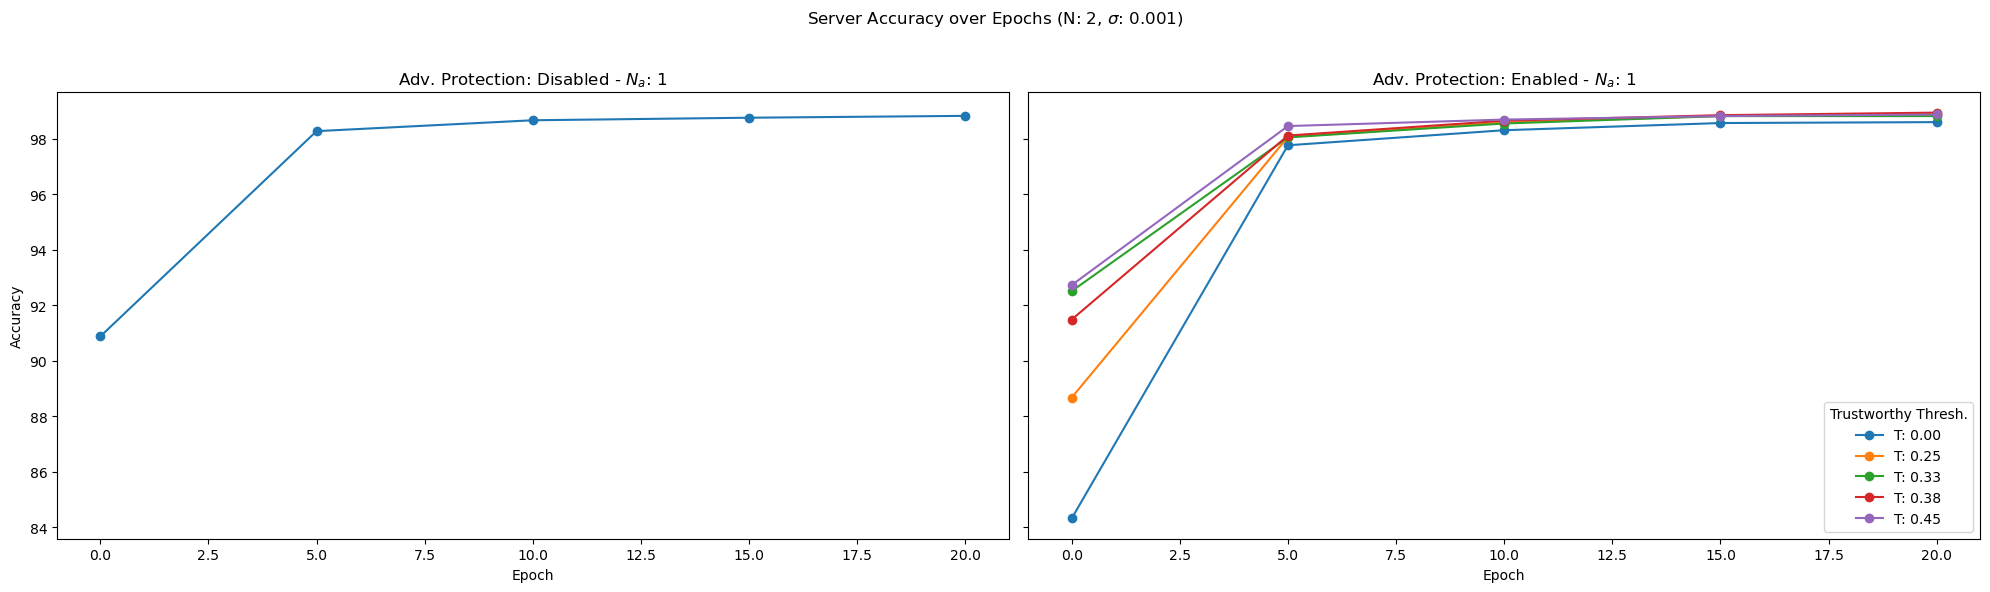

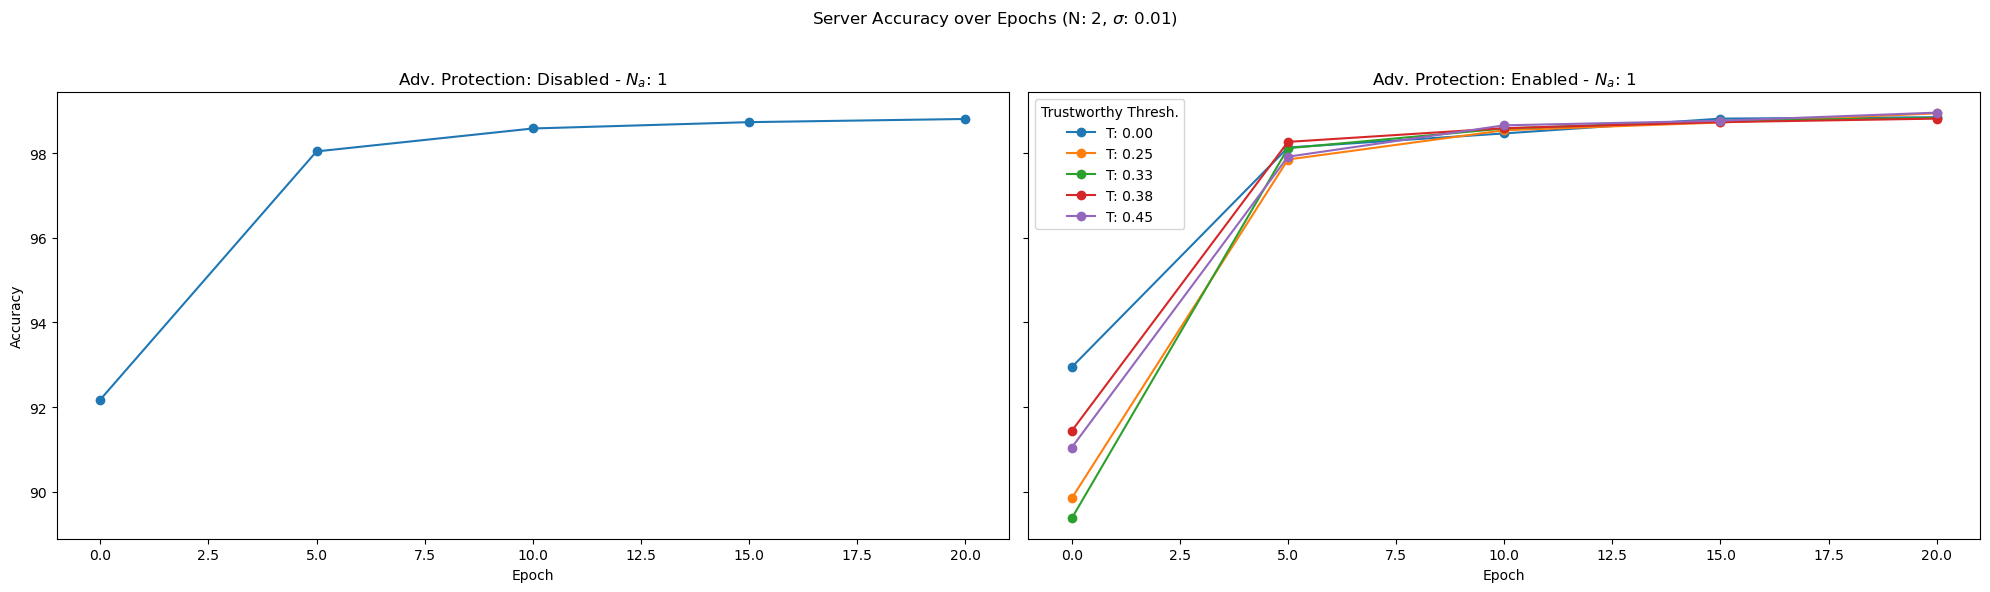

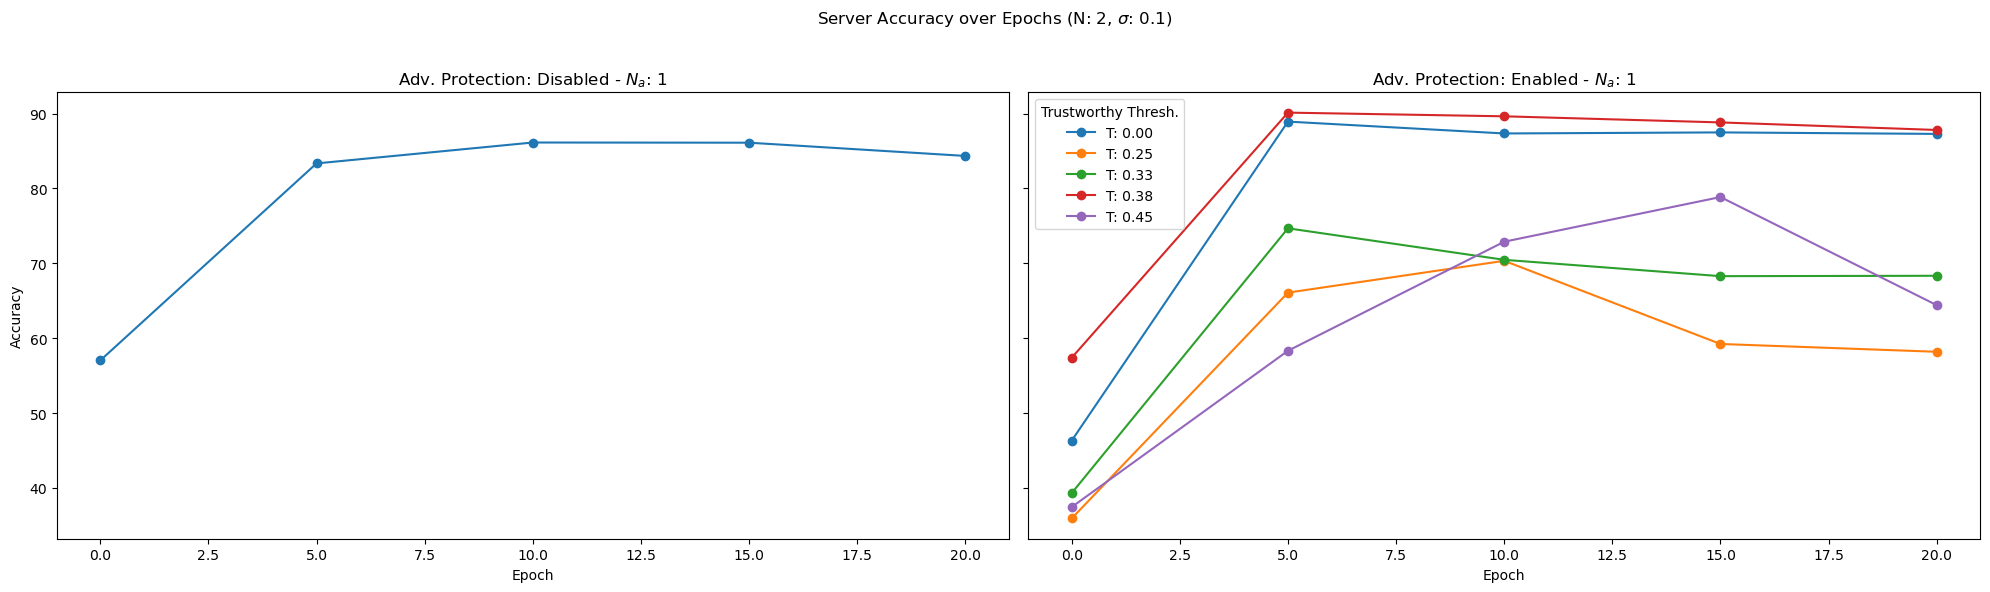

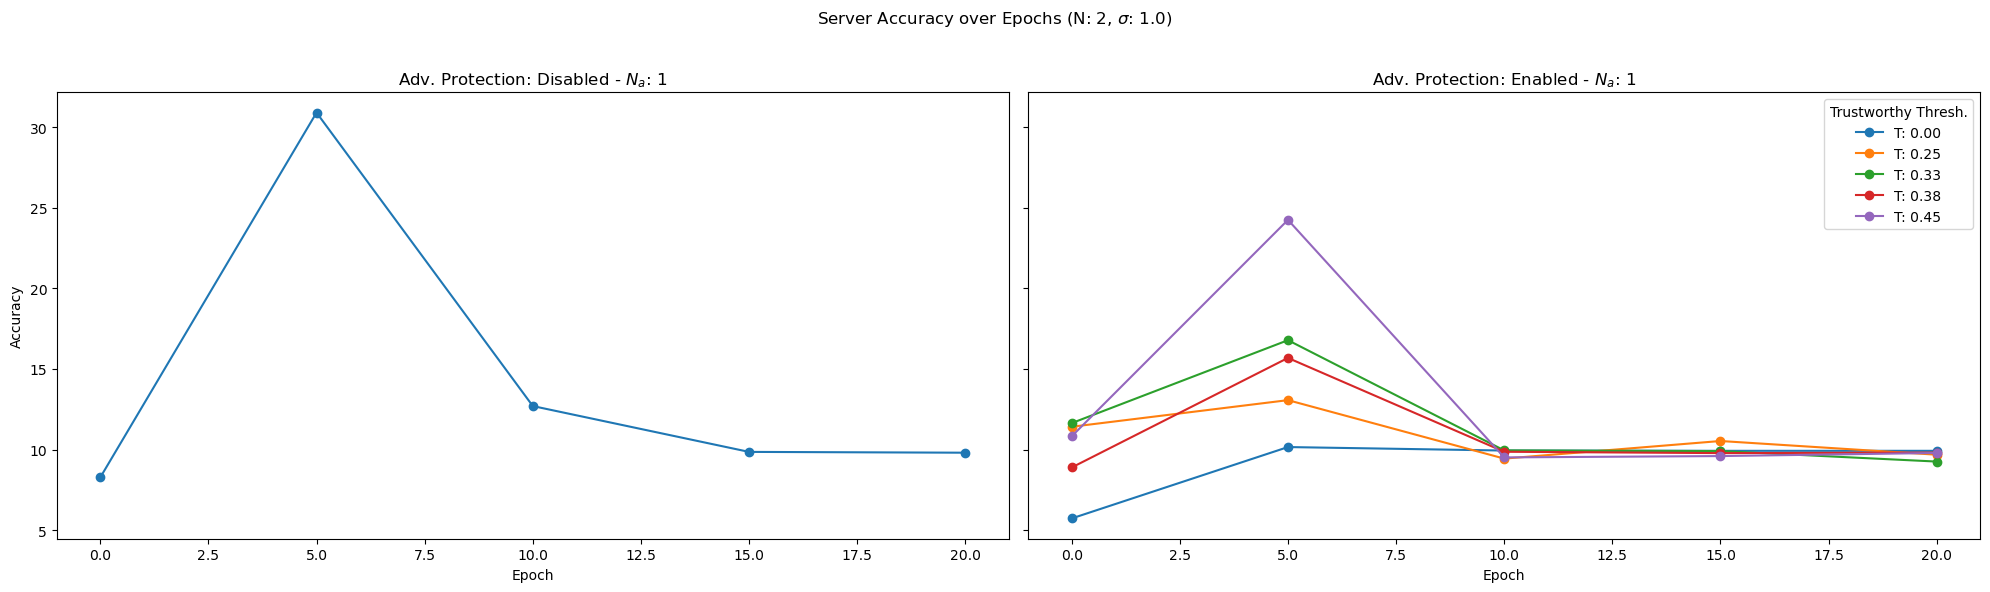

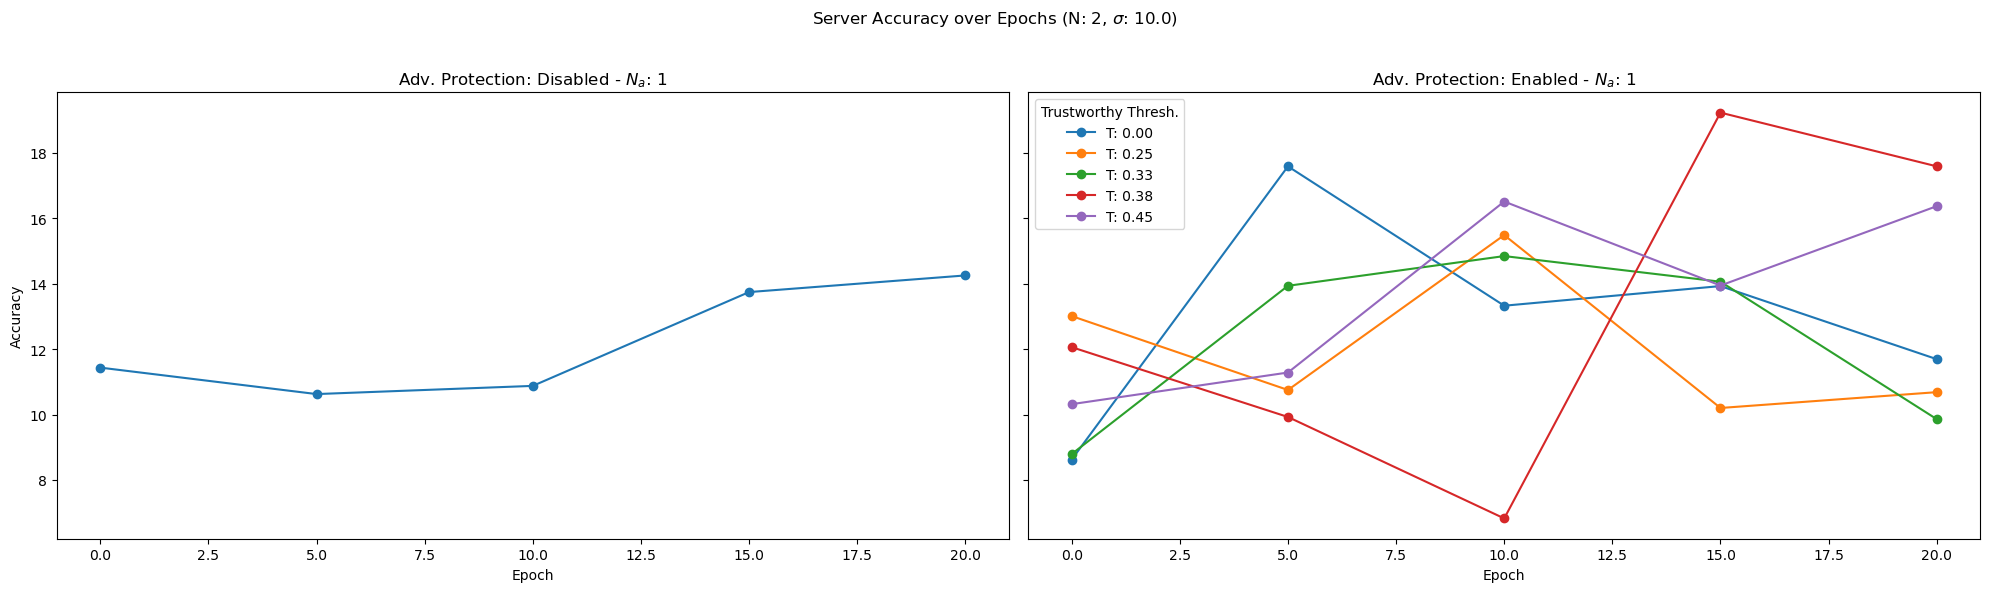

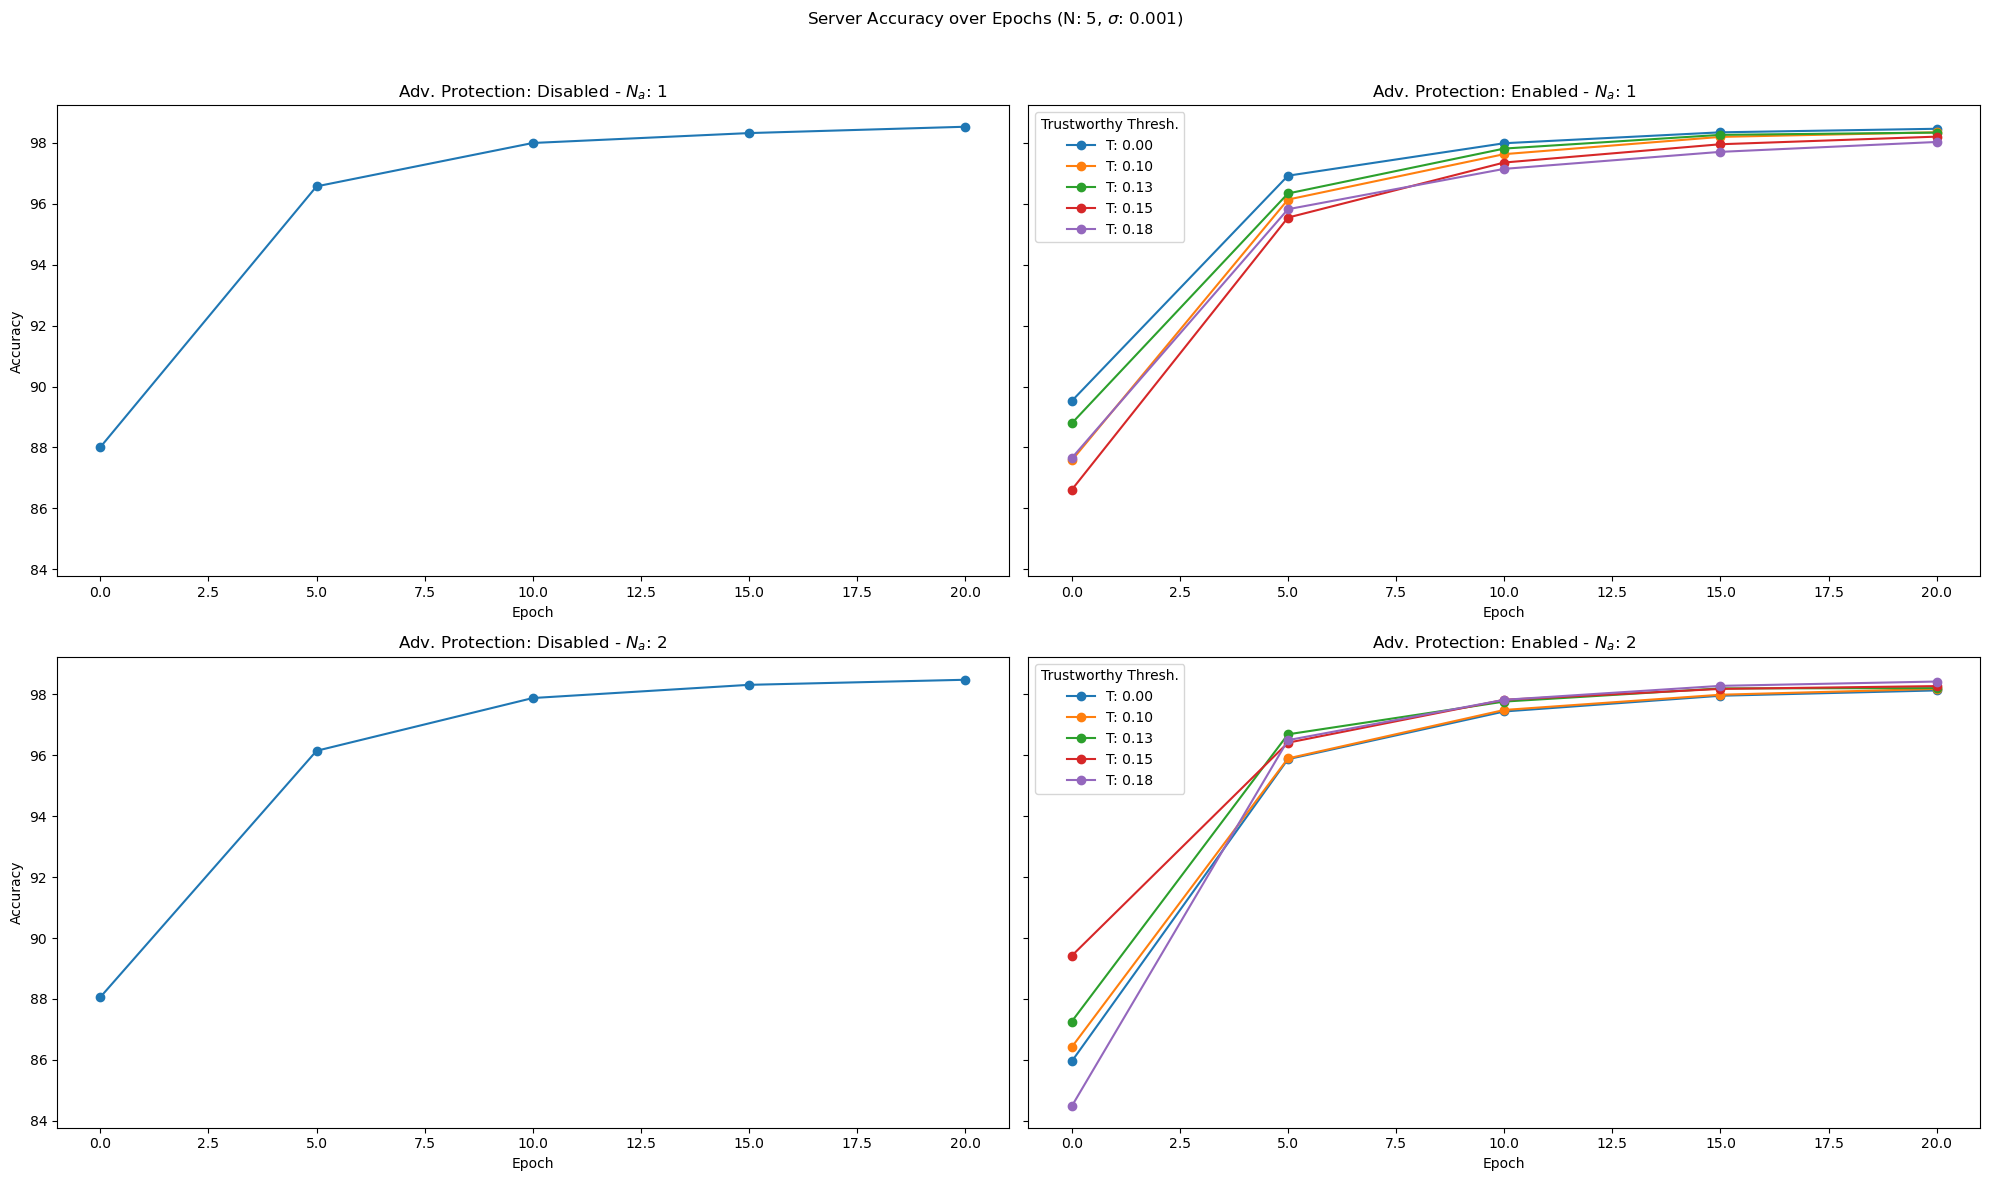

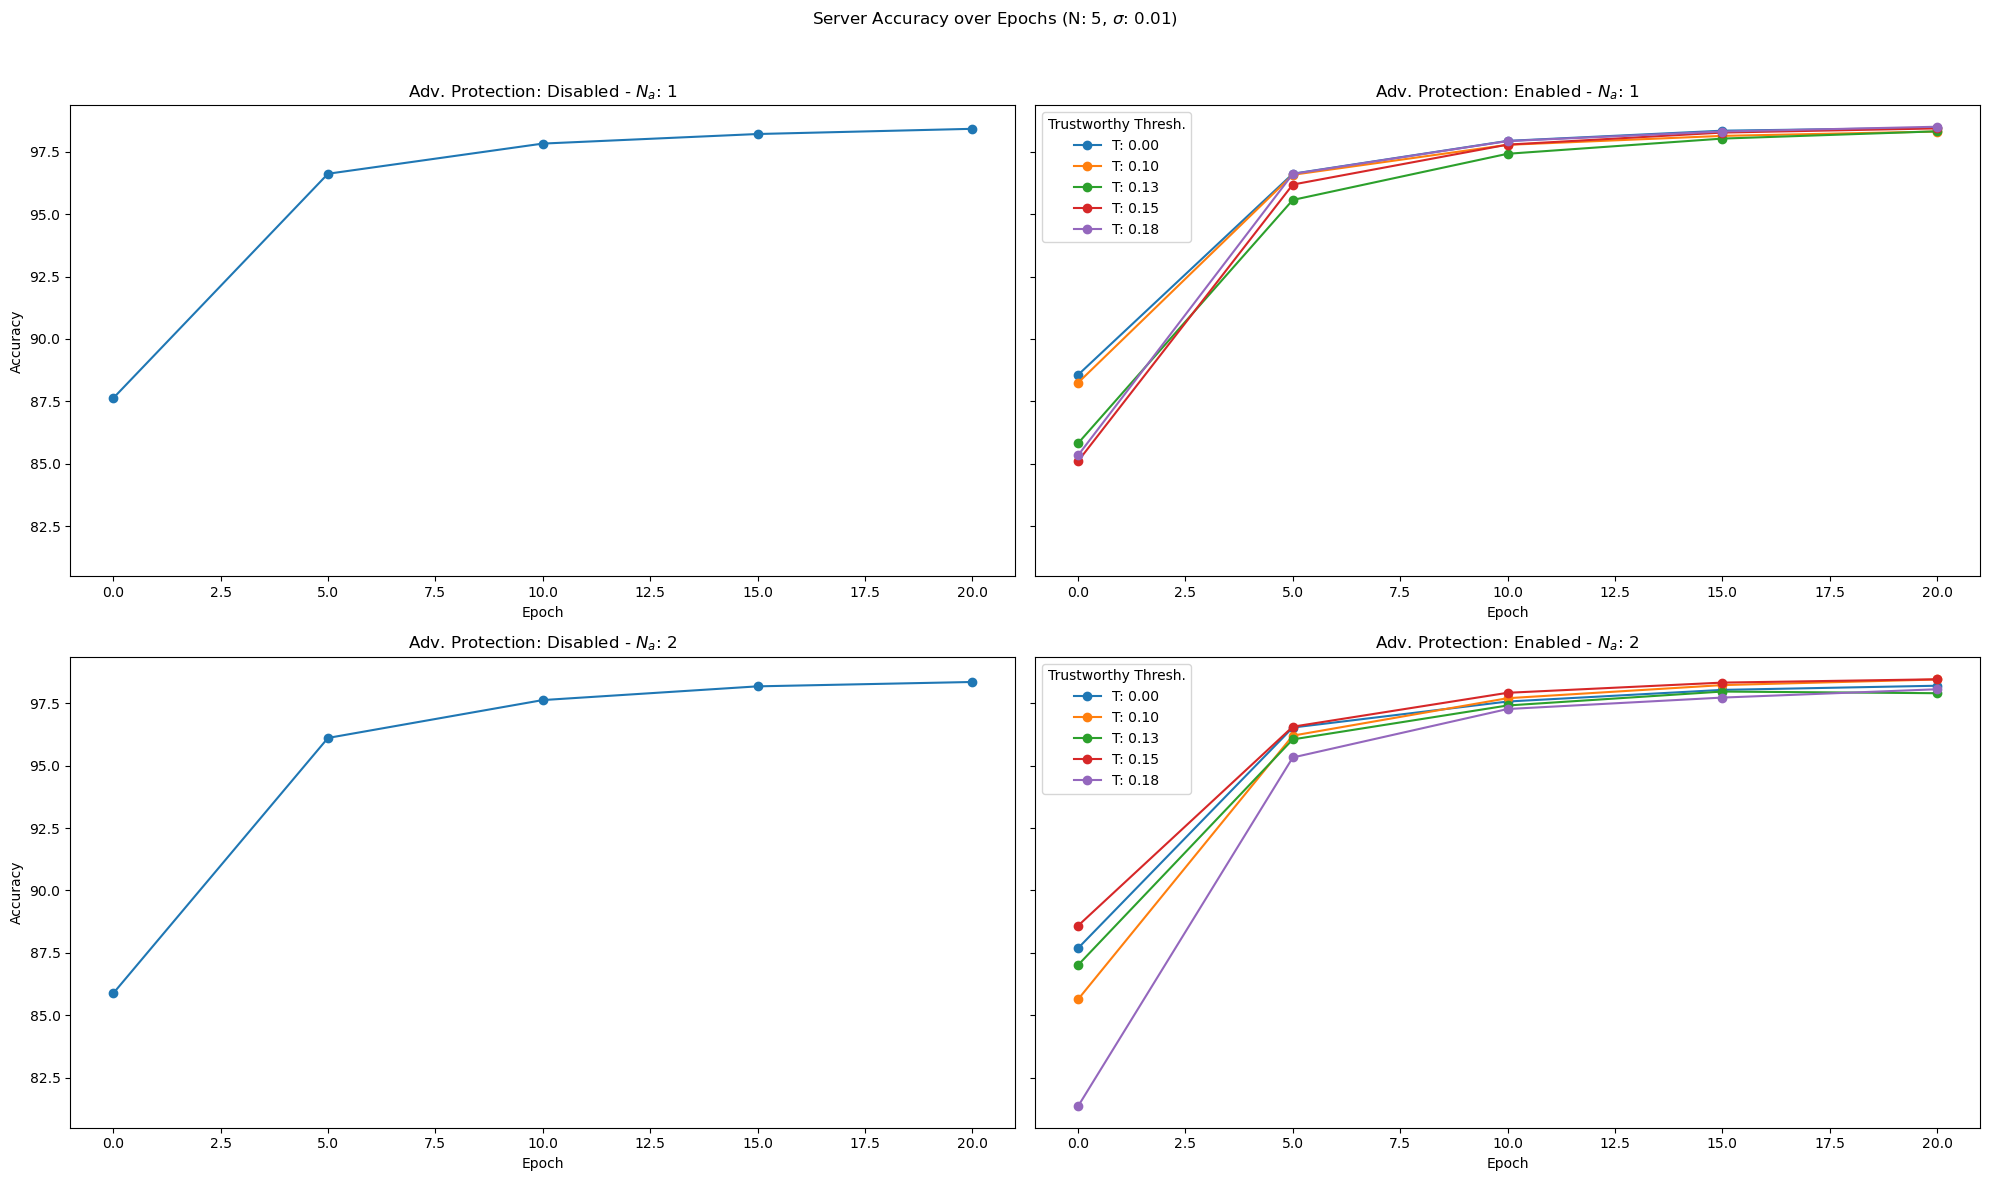

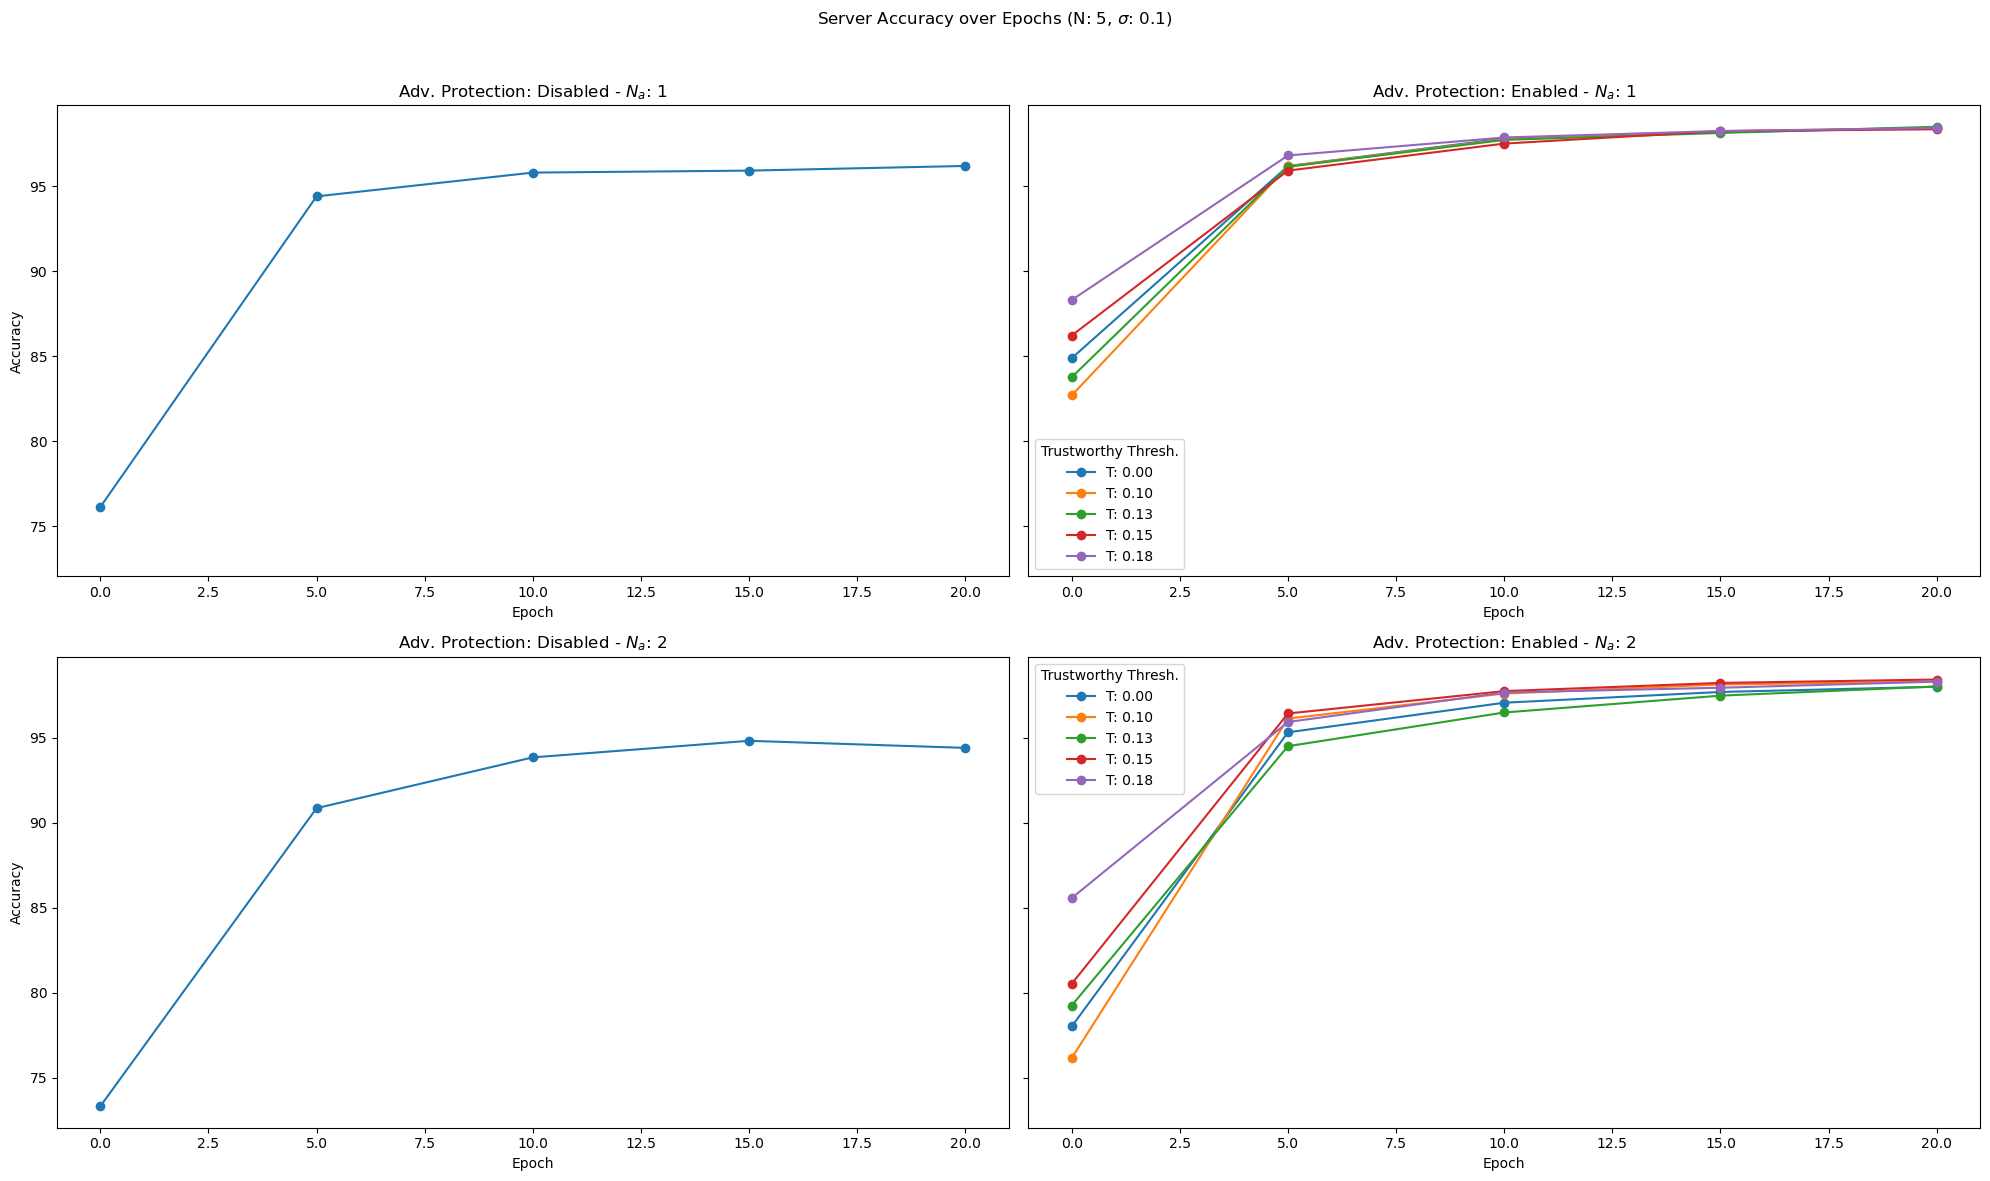

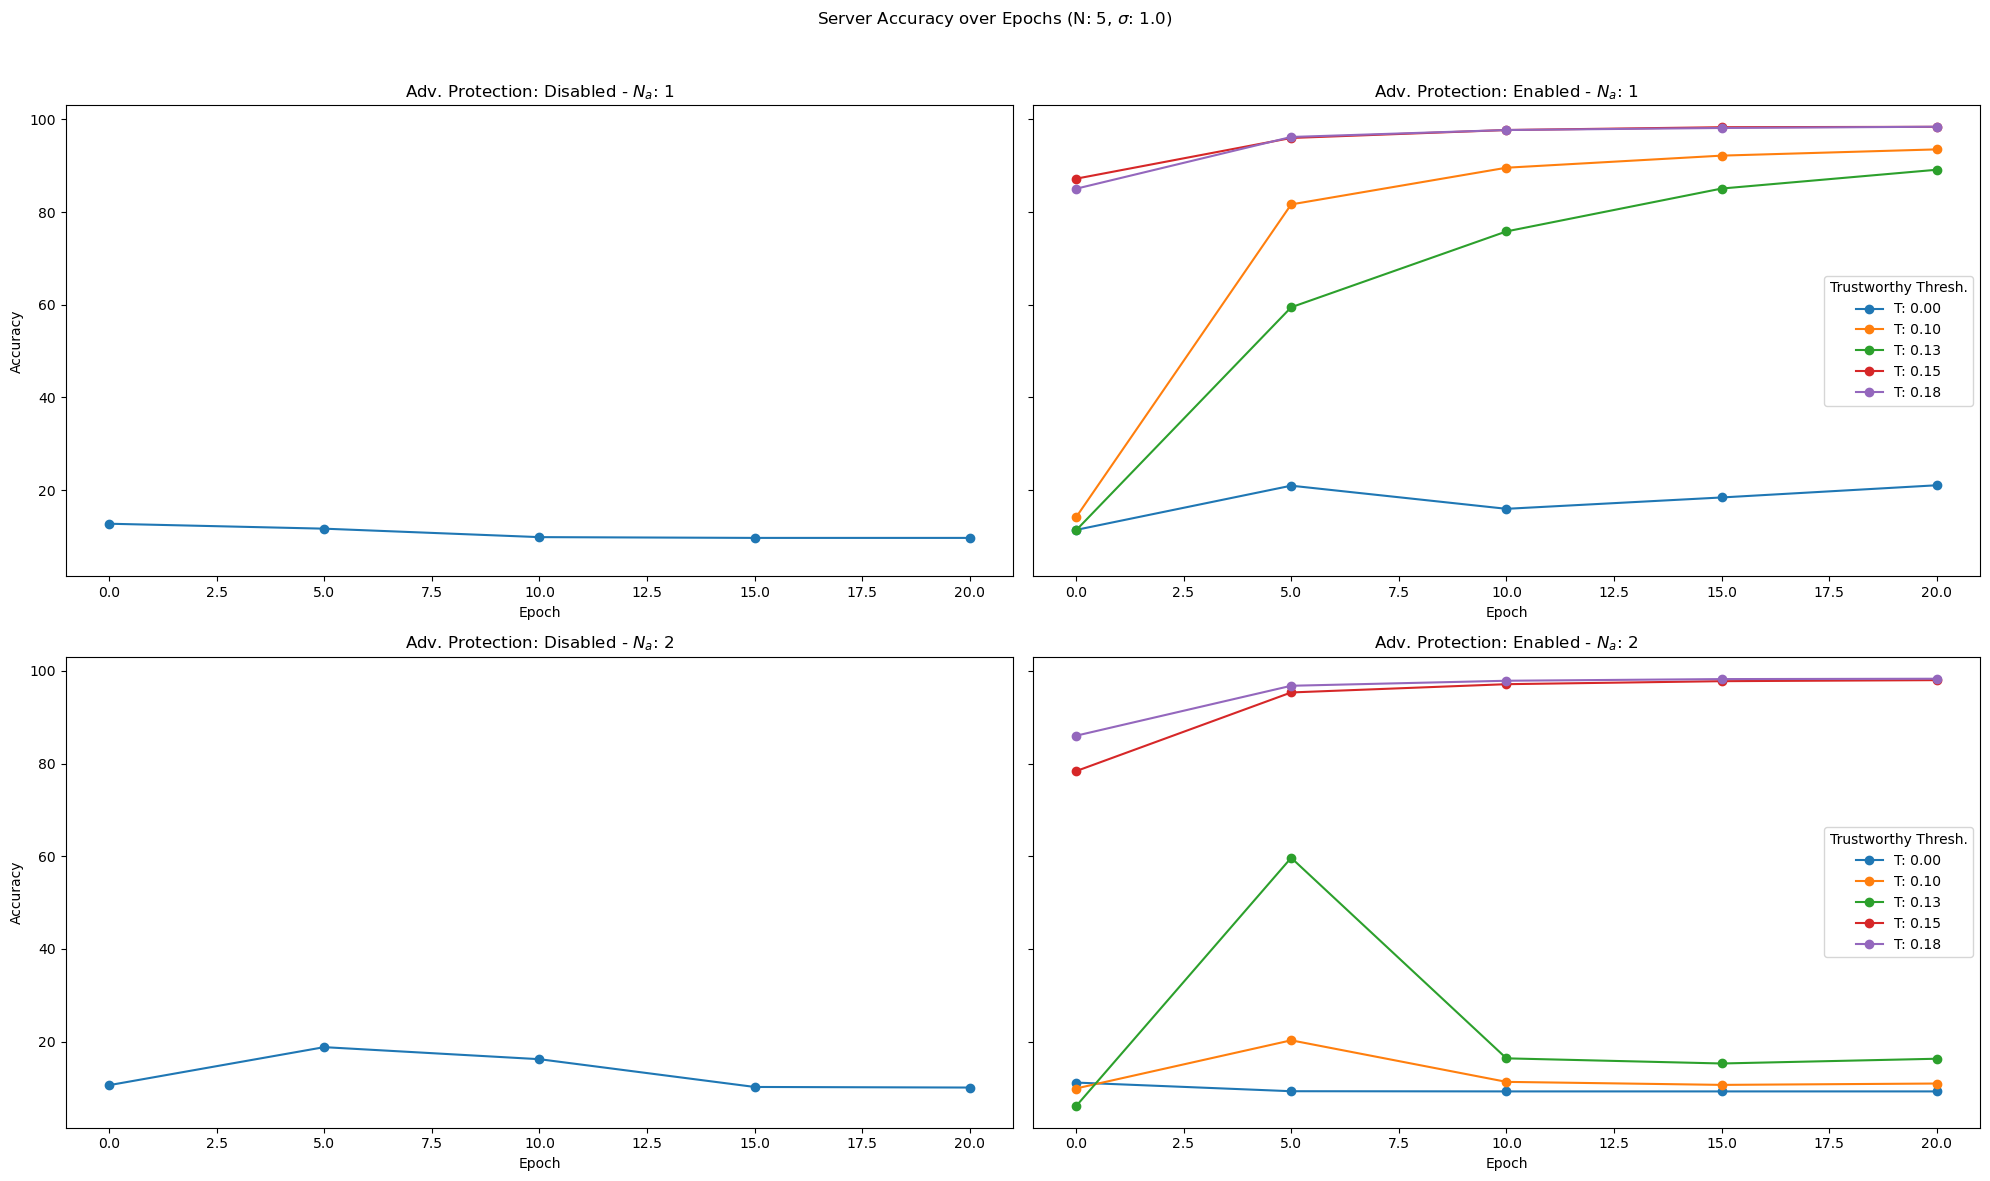

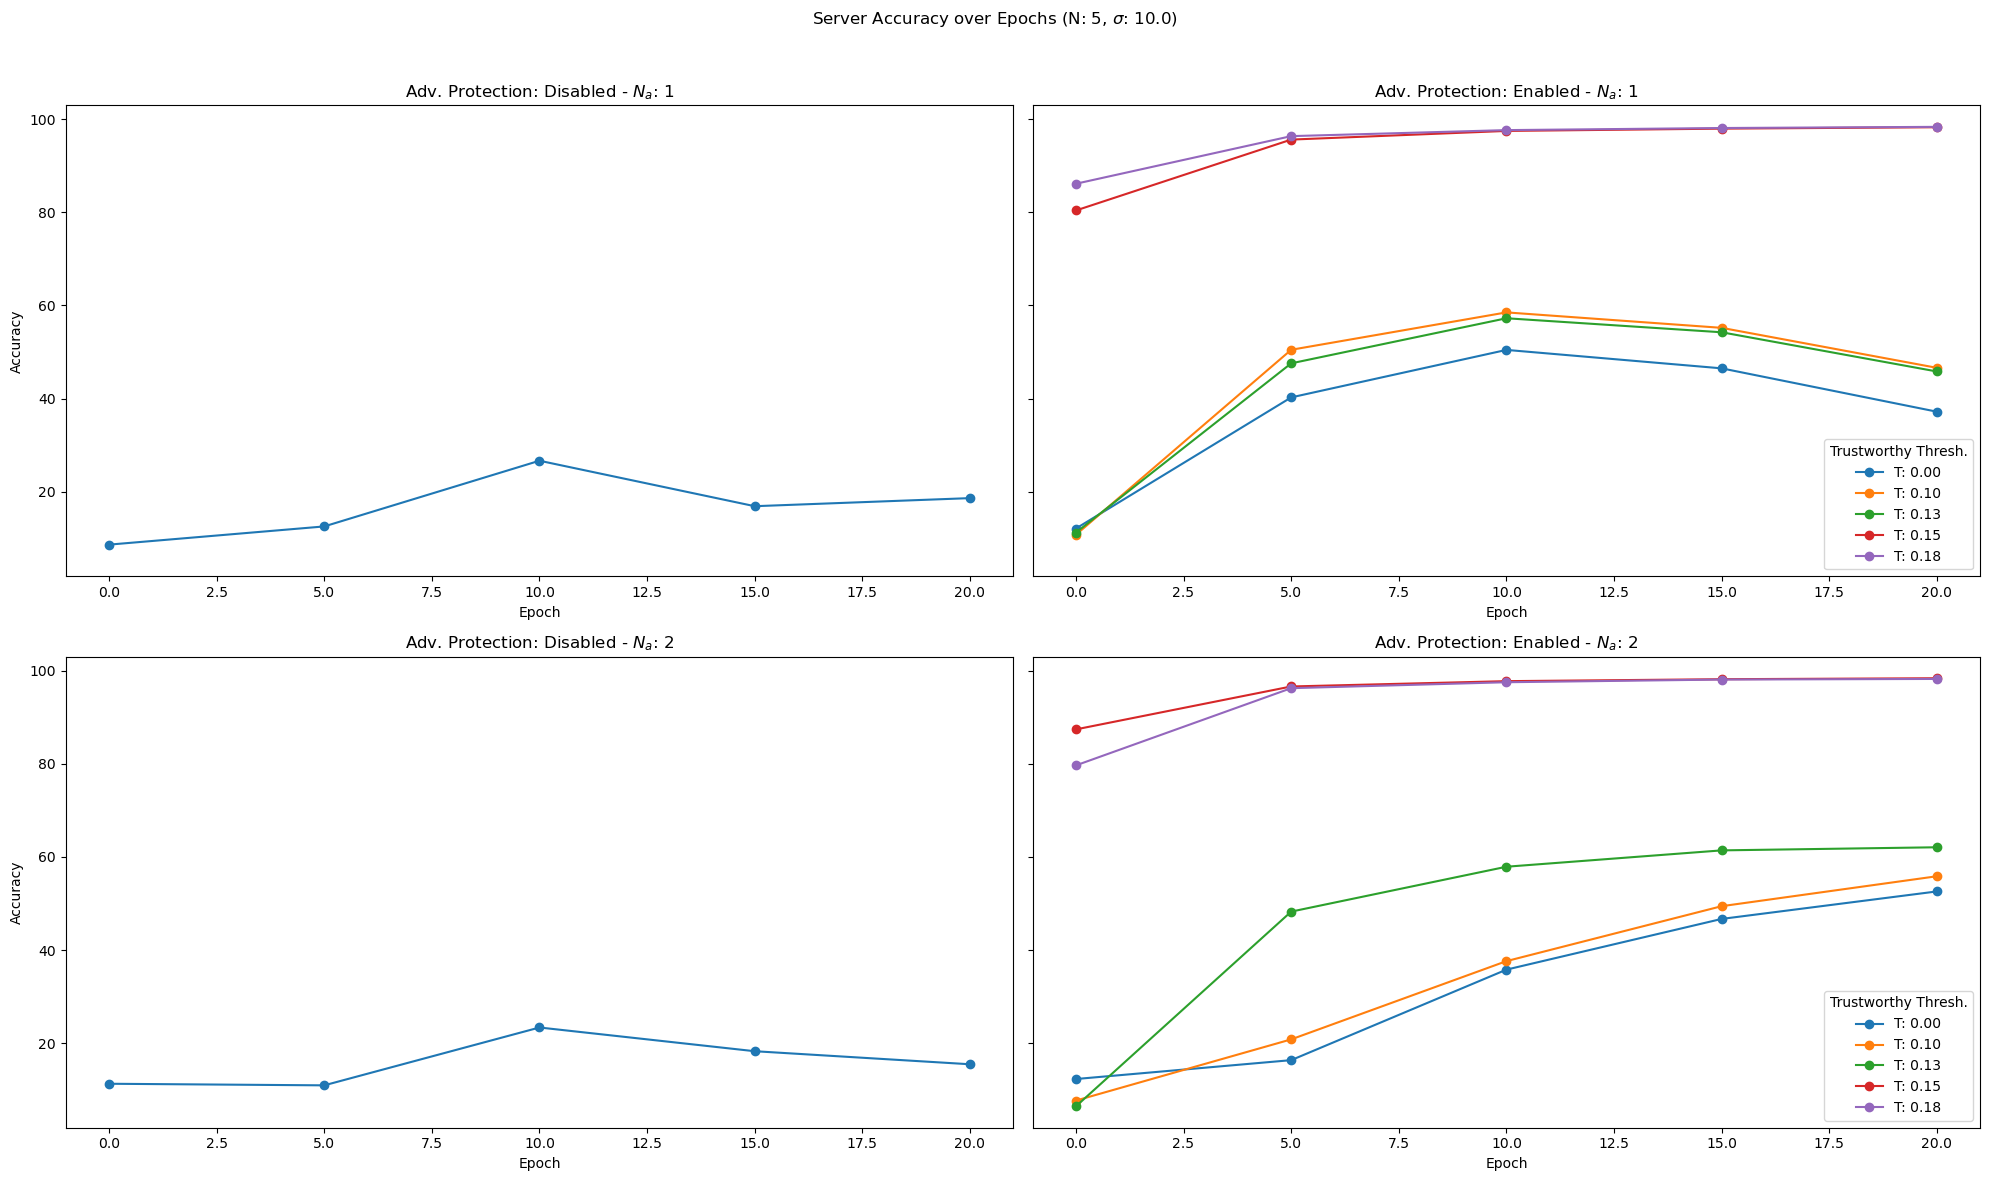

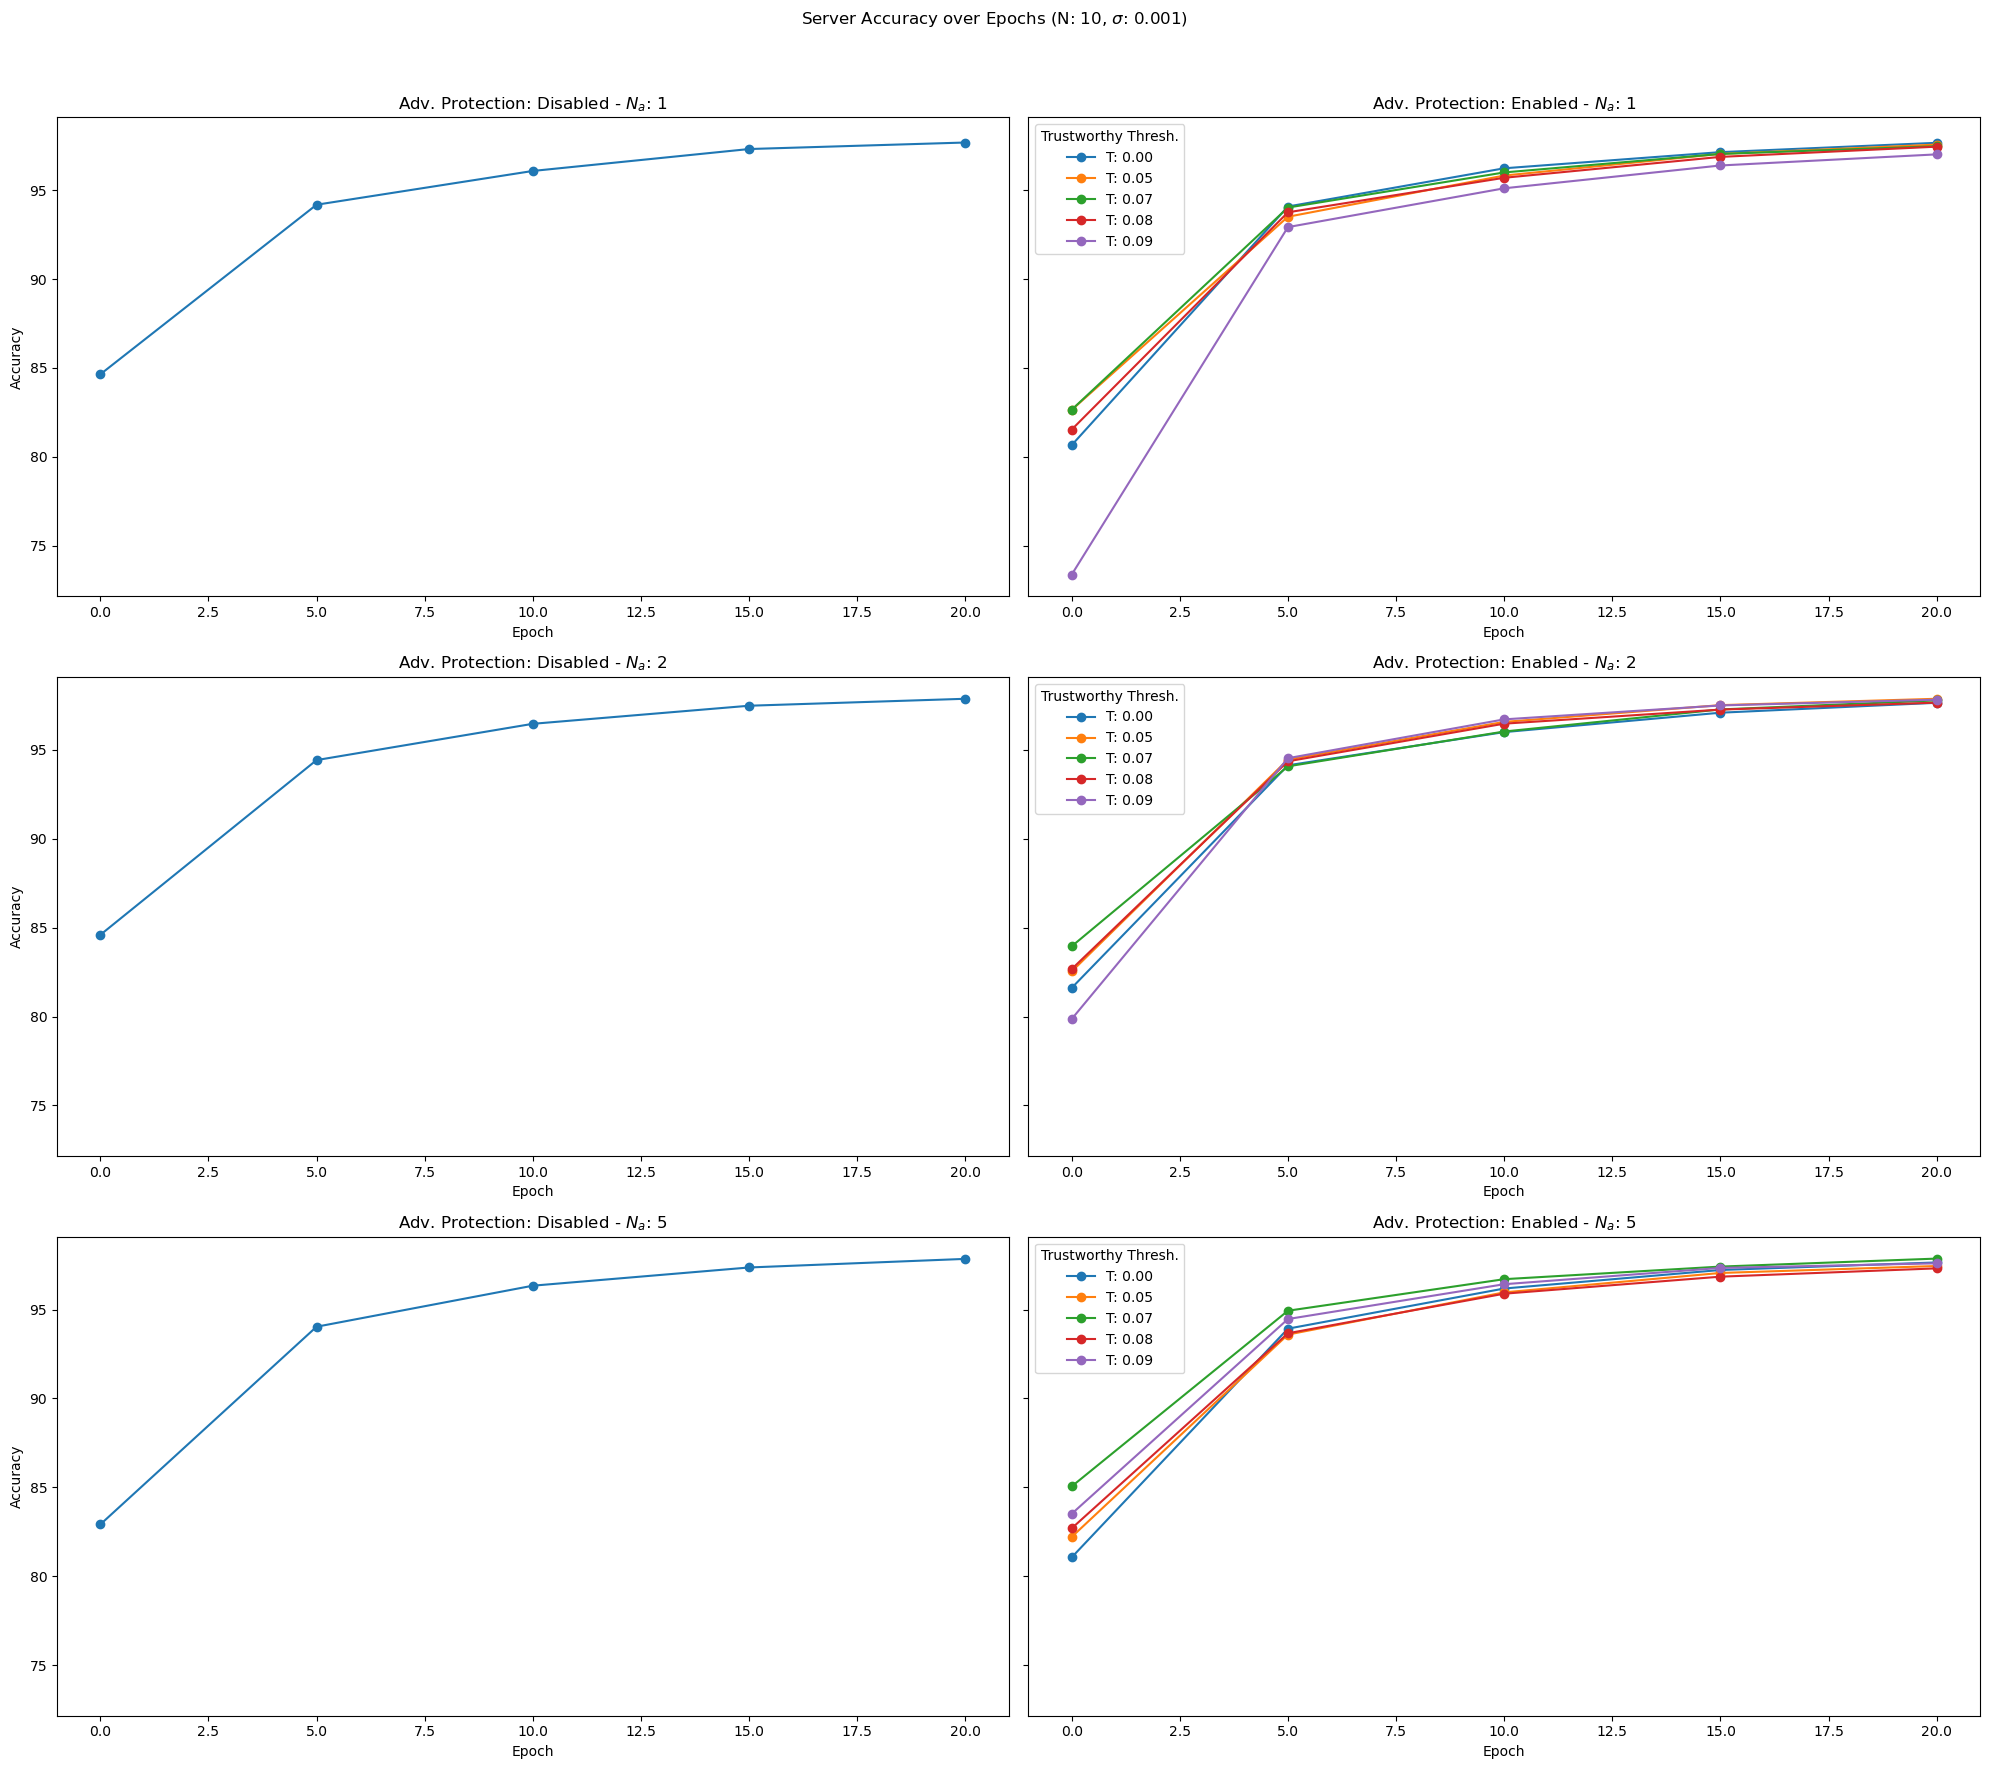

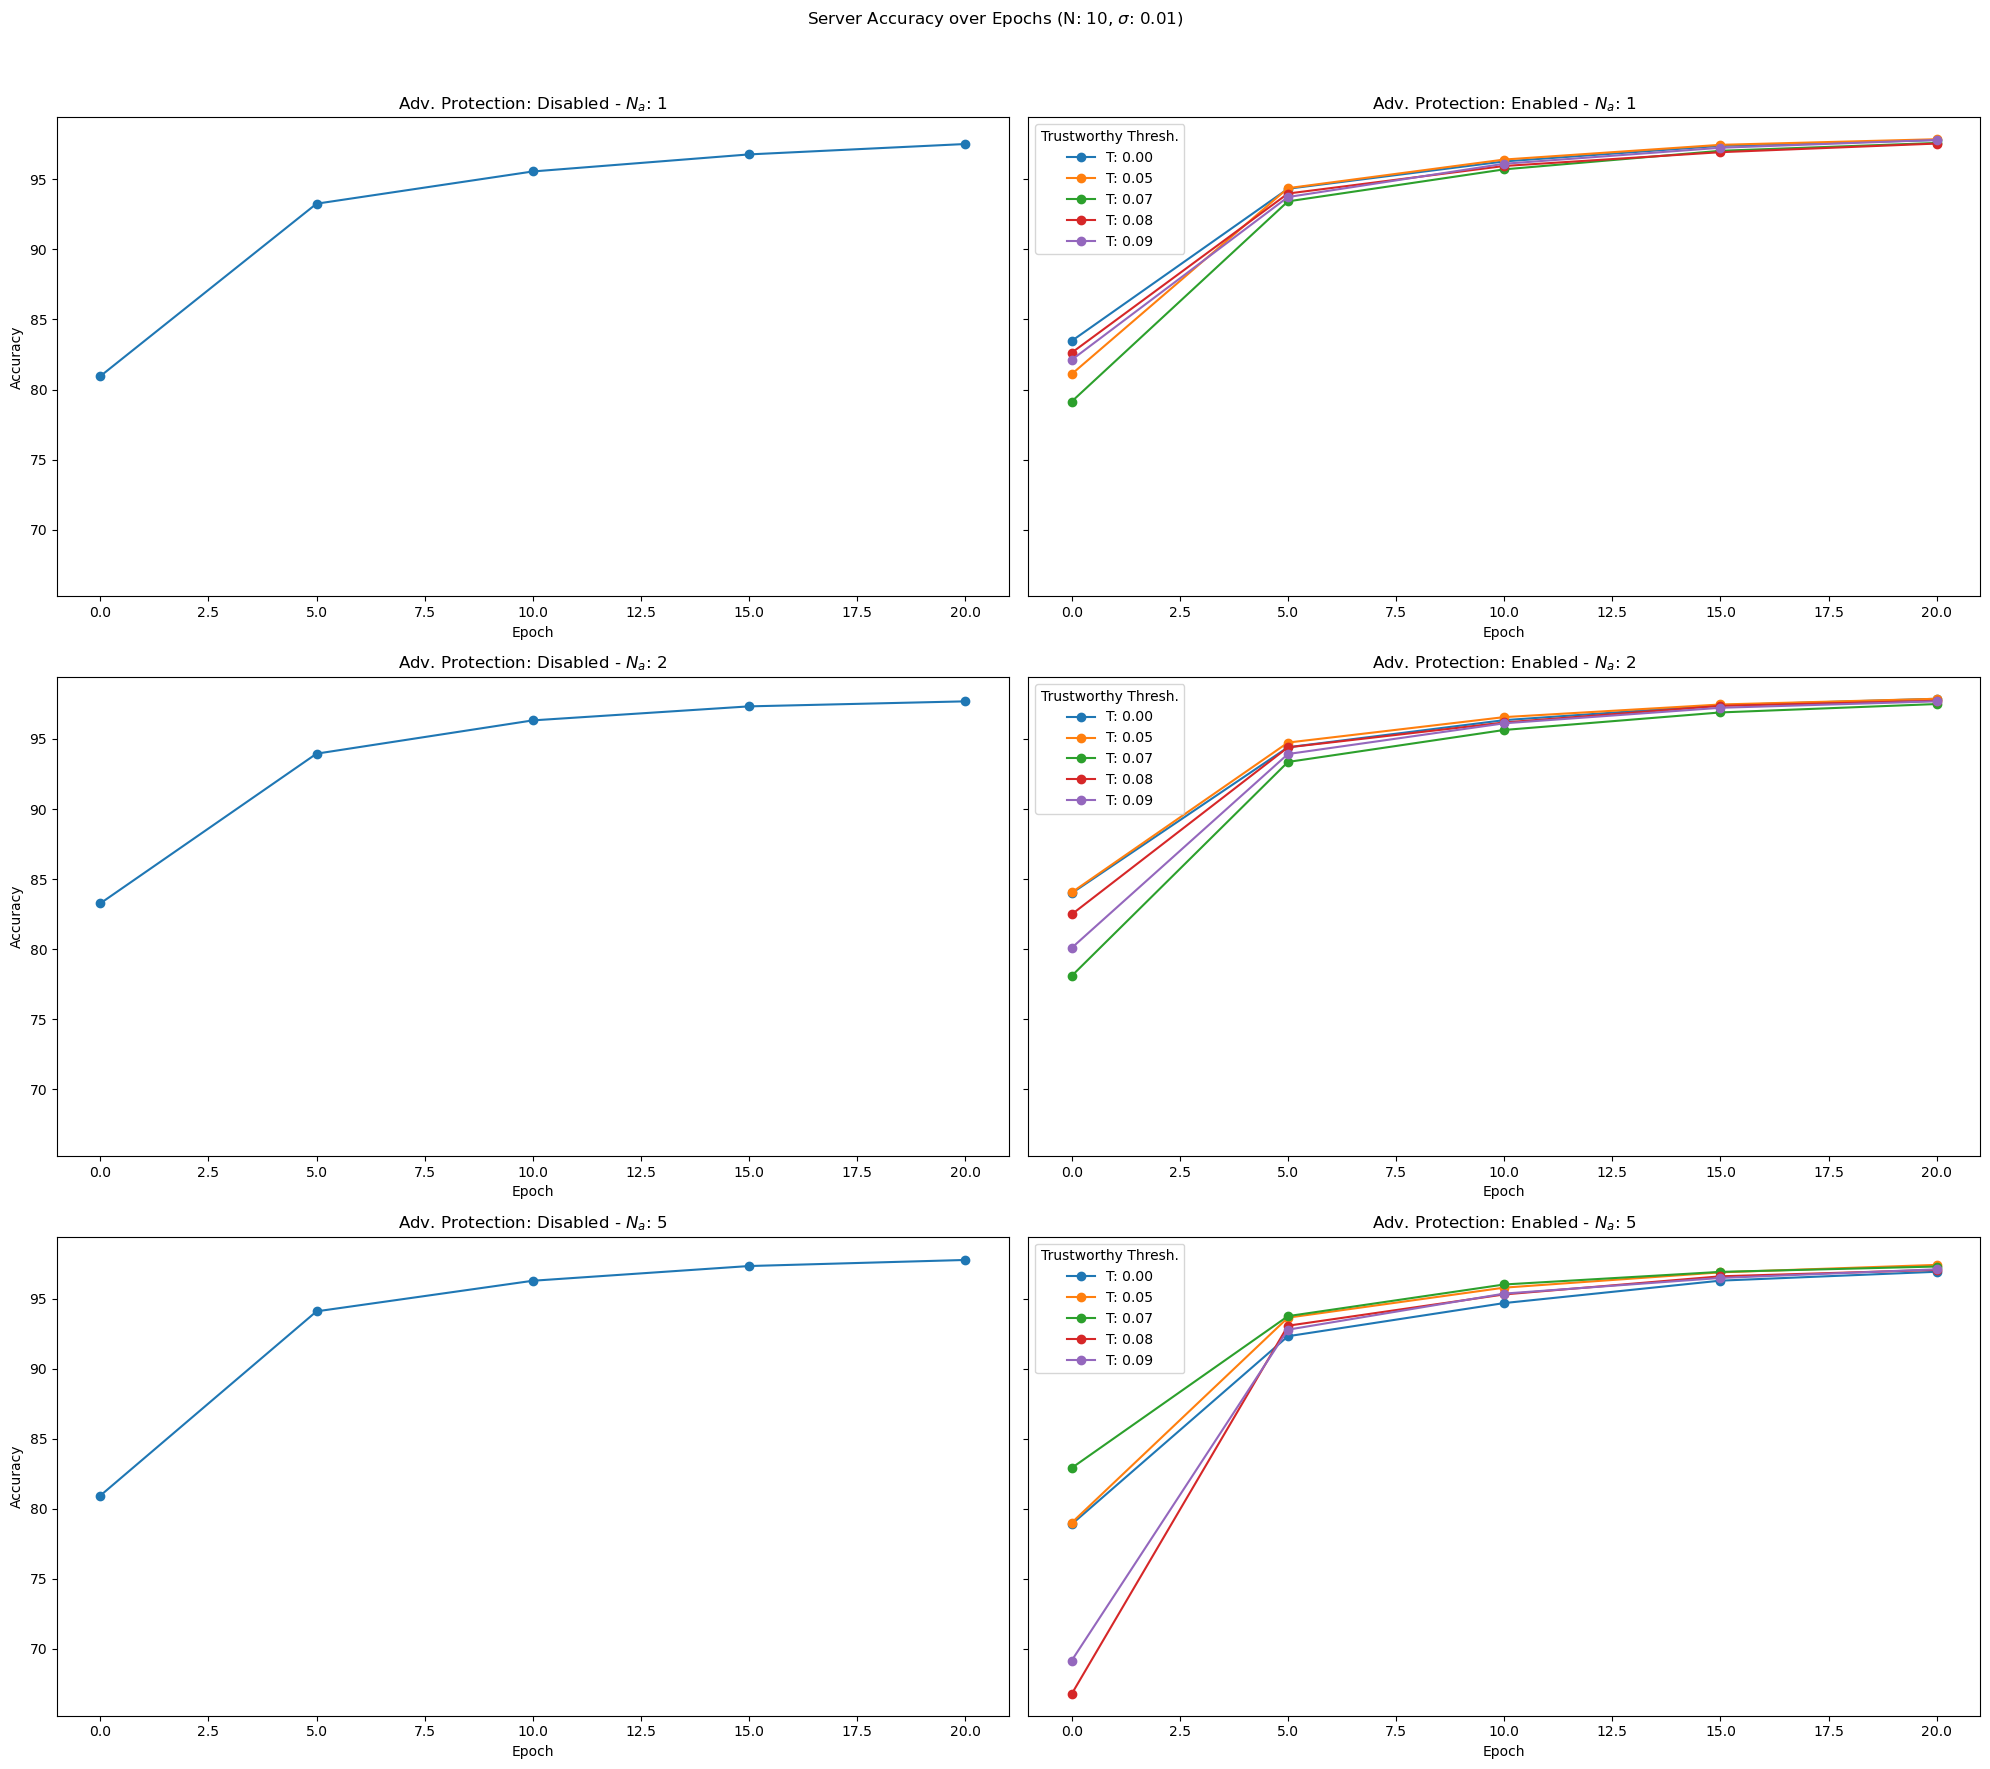

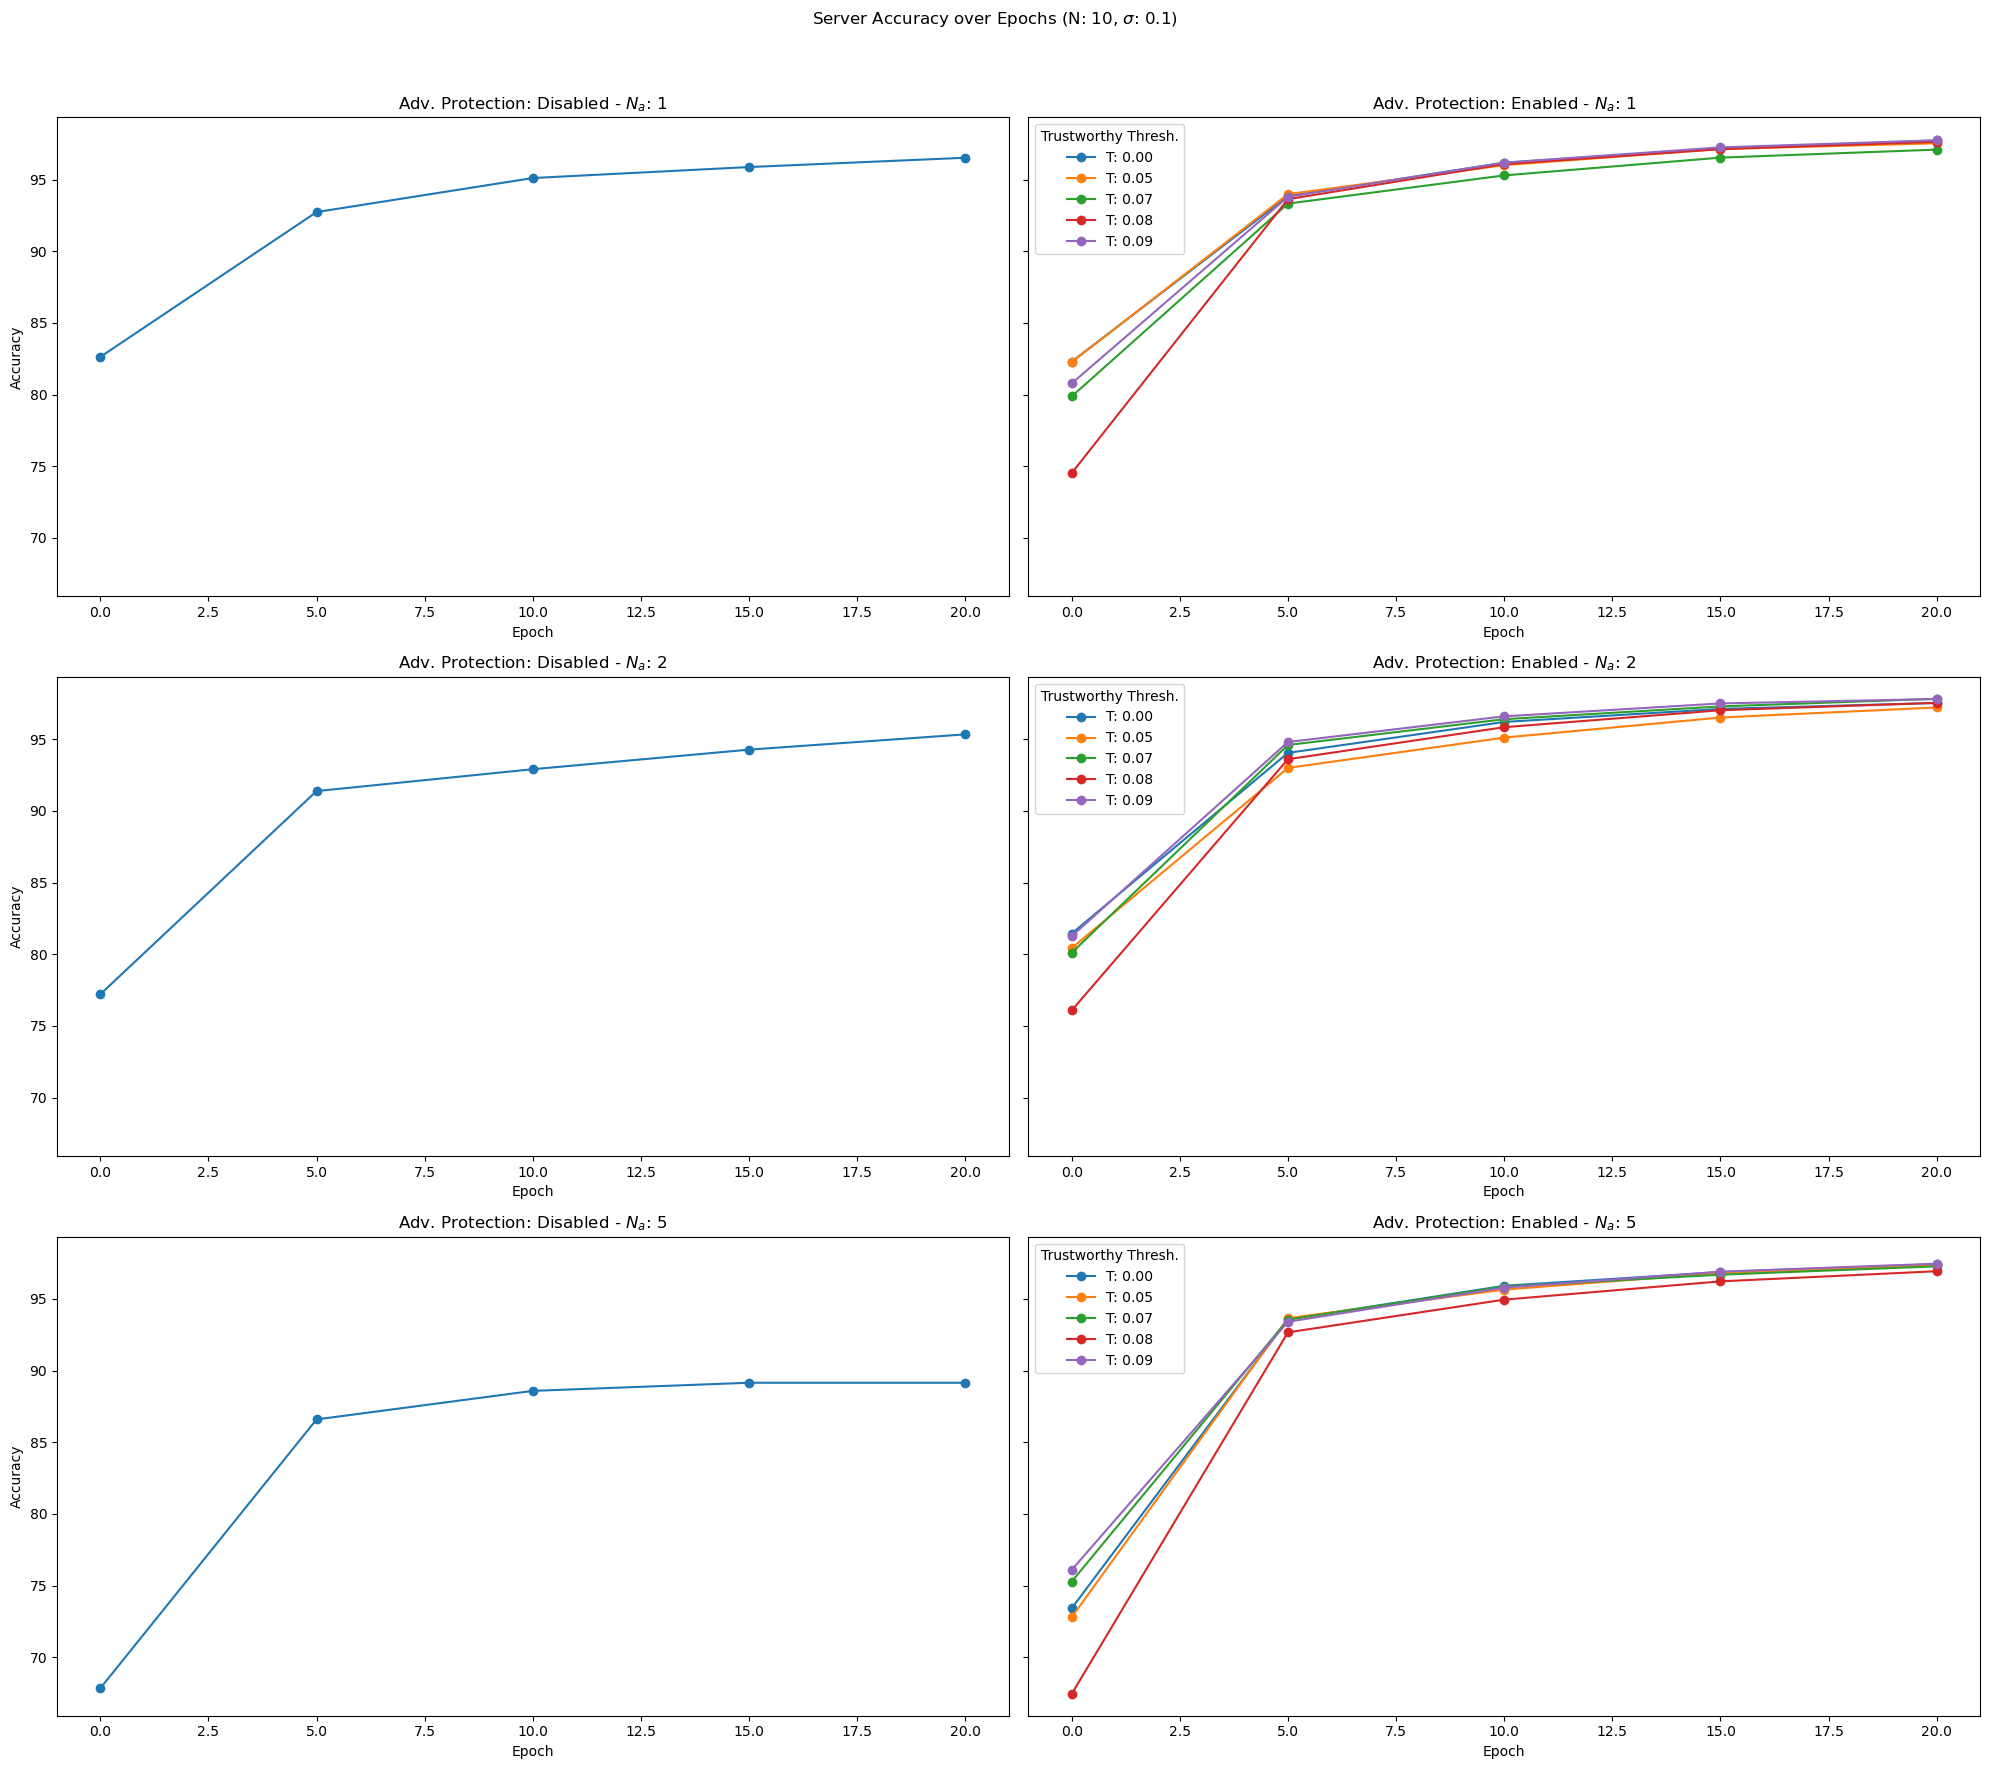

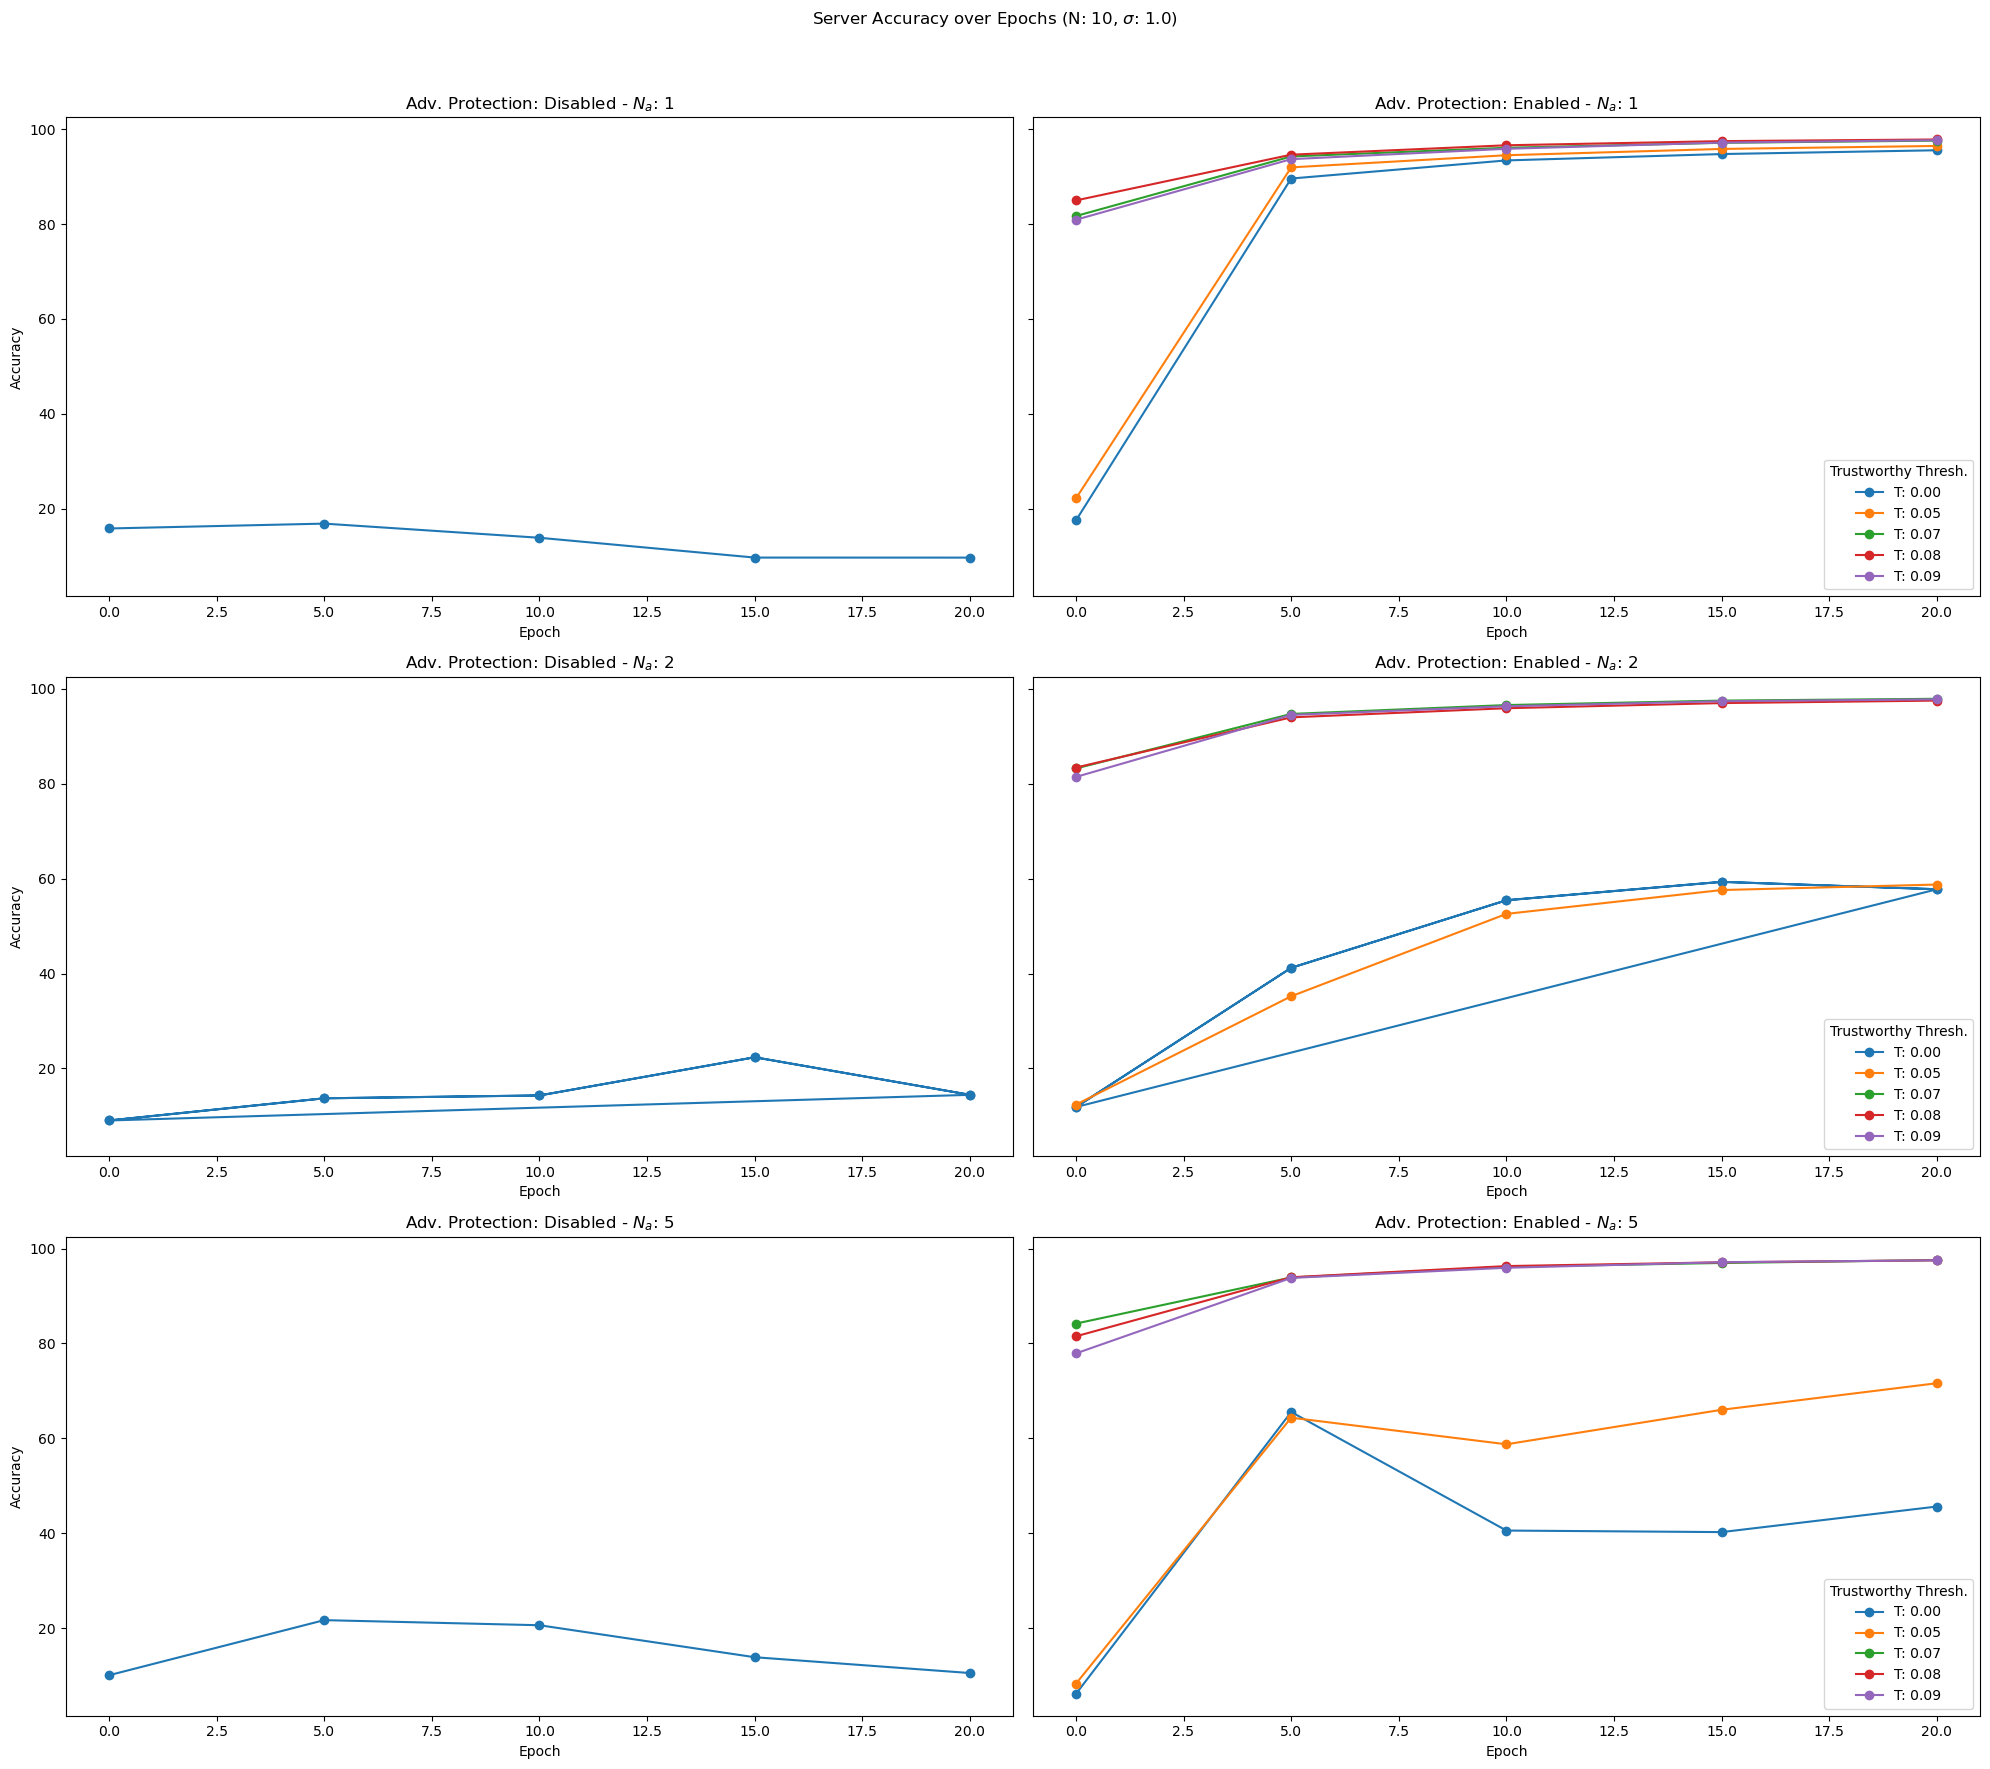

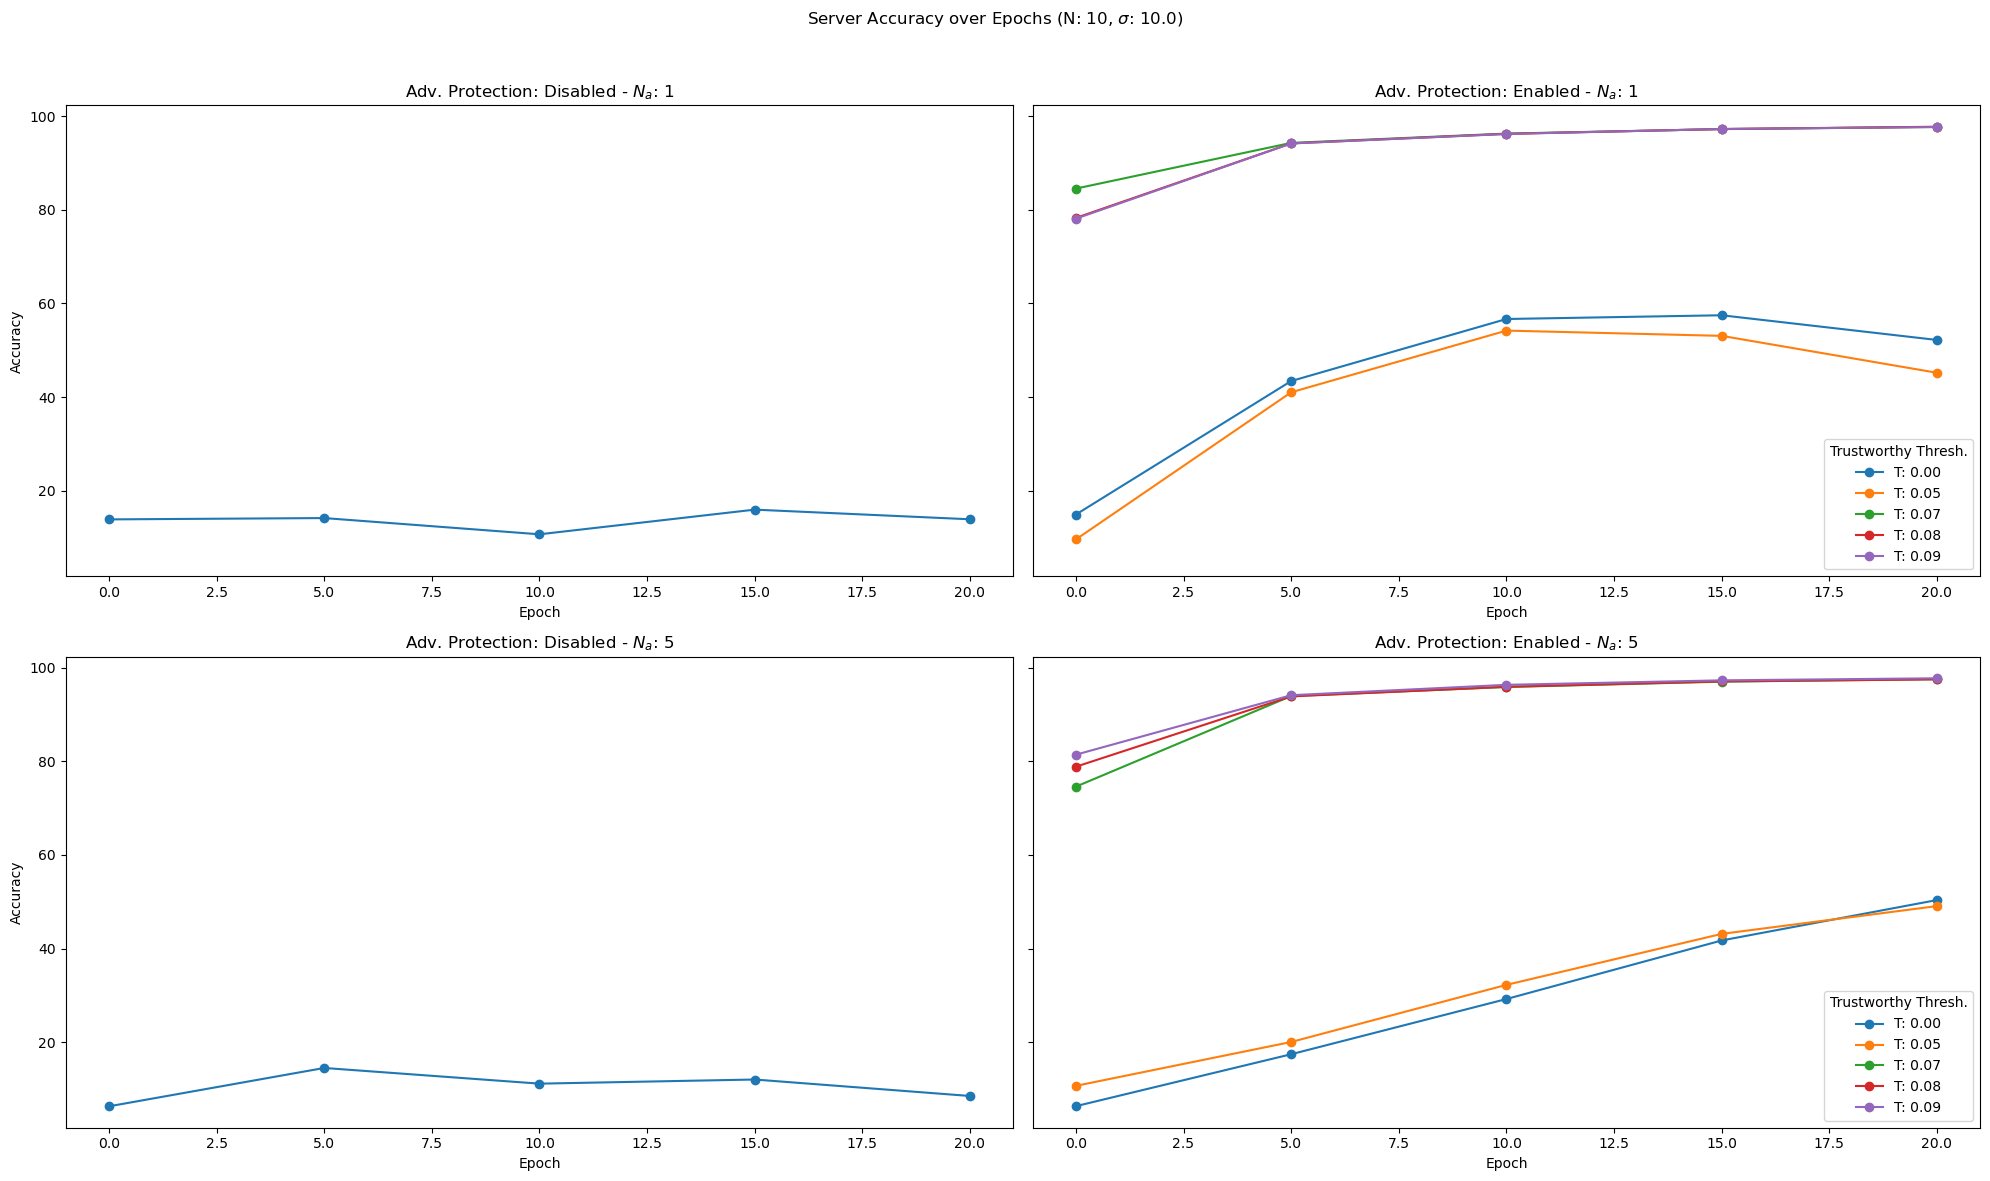

In [6]:
# Group data by 'n_clients' and 'noise_multiplier'
for (n_clients, noise_multiplier), group in results_df.groupby(['n_clients', 'noise_multiplier']):
    # Determine the number of unique 'n_adv' values for subplot dimensions
    n_advs = group['n_adv'].nunique()
    
    # Create a figure with subplots; each subplot represents a different 'n_adv' value
    # Two columns for adv_protection status, rows depend on 'n_adv' count
    fig, axes = plt.subplots(n_advs, 2, figsize=(20, 6 * n_advs), sharey=True)  
    
    # Ensure axes is two-dimensional in case of a single row
    if n_advs == 1:
        axes = axes.reshape(1, -1)

    # Group by 'adv_protection' and then by 'n_adv'
    for idx, (adv_protection, adv_group) in enumerate(group.groupby('adv_protection')):
        for jdx, (n_adv, n_adv_group) in enumerate(adv_group.groupby('n_adv')):
            ax = axes[jdx, idx]
            
            # Plot lines for each 'trustworthy_threshold' in the 'n_adv' group
            for (trustworthy_threshold), subgroup in n_adv_group.groupby('trustworthy_threshold'):
                label = f'T: {trustworthy_threshold:.2f}'
                subgroup.plot(x='epoch', y='accuracy', ax=ax, marker='o', label=label if adv_protection else None)
            
            ax.set_title(f'Adv. Protection: {"Enabled" if adv_protection else "Disabled"} - $N_a$: {n_adv}')
            ax.set_xlabel('Epoch')
            ax.set_ylabel('Accuracy')
            if adv_protection:
                ax.legend(title='Trustworthy Thresh.')
            else:
                ax.legend().remove()

    # Set a super title for the whole figure
    plt.suptitle(f'Server Accuracy over Epochs (N: {n_clients}, $\sigma$: {noise_multiplier})')
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit super title
    plt.show()
